<a href="https://colab.research.google.com/github/Aridhi-Dhia-eddine/Sant-et-S-curit-au-Travail-des-Femmes-Agricultrices-/blob/main/ful_project_%2B_late_future_vision_and_voting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

siim_isic_melanoma_classification_path = kagglehub.competition_download('siim-isic-melanoma-classification')
kmader_skin_cancer_mnist_ham10000_path = kagglehub.dataset_download('kmader/skin-cancer-mnist-ham10000')
andrewmvd_isic_2019_path = kagglehub.dataset_download('andrewmvd/isic-2019')

print('Data source import complete.')


In [ ]:
!pip install torch_pruning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.1/64.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing in

# config.py

In [ ]:
%%writefile config.py
import os
import uuid
import torch

class Config:
    seed = 42
    batch_size = 16
    num_classes = 2
    input_shape = (224, 224)
    num_epochs = 10
    fine_tune_epochs = 5
    distillation_epochs = 12
    meta_features_list = ['sex', 'age_approx', 'anatom_site_general_challenge', 'age_sex_interaction']
    n_meta_features = len(meta_features_list)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    num_workers = 0
    lr = 1e-4
    fine_tune_lr = 5e-6
    distillation_lr = 2e-5
    weight_decay = 1e-5
    checkpoint_dir = "./checkpoints"
    plot_dir = "./plots"
    xception_model_path = "./xception_model.pth"
    convnextv2_model_path = "./convnextv2_model.pth"
    efficientnet_model_path = "./efficientnet_model.pth"
    student_model_path = "./student_model.pth"
    swin_model_path = "./swin_model.pth"
    fusion_model_path = "./fusion_model.pth"
    data_sources = {
        'isic_2020': {
            'csv': "/kaggle/input/siim-isic-melanoma-classification/train.csv",
            'img_dir': "/kaggle/input/siim-isic-melanoma-classification/jpeg/train"
        },
        'isic_2019': {
            'gt_csv': "/kaggle/input/isic-2019/ISIC_2019_Training_GroundTruth.csv",
            'meta_csv': "/kaggle/input/isic-2019/ISIC_2019_Training_Metadata.csv",
            'img_dir': "/kaggle/input/isic-2019/ISIC_2019_Training_Input"
        },
        'ham10000': {
            'csv': "/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv",
            'img_dir': [
                "/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_1",
                "/kaggle/input/skin-cancer-mnist-ham10000/ham10000_images_part_2"
            ]
        }
    }
    subset_fraction = 0.005
    ham_subset_fraction = 0.005
    patience = 7
    augmented_data_dir = "./augmented_melanoma"
    target_melanoma_count = 216
    dropout_rate = 0.3
    accum_steps = 2
    instance_id = uuid.uuid4()
    distillation_temperature = [2.0, 1.5, 1.0]  # Lower temperatures for sharper soft targets
    distillation_alpha = [0.5, 0.3, 0.1]       # Increase focus on hard labels
    teacher_weight_swin = 0.10
    teacher_weight_xception = 0.35
    teacher_weight_convnextv2 = 0.3
    teacher_weight_efficientnet = 0.3
    gradcam_dir = "./gradcam"
    xgboost_model_path = "./xgboost_model.json"
    gan_model_path = "./gan_model.pth"
    lime_explainer = None  # Initialized later due to import dependency
    lr_fusion = 5e-4
    lime_dir = "./lime_explanations"  # Added for LIME output

# Create directories
os.makedirs(Config.checkpoint_dir, exist_ok=True)
os.makedirs(Config.augmented_data_dir, exist_ok=True)
os.makedirs(Config.plot_dir, exist_ok=True)
os.makedirs(Config.gradcam_dir, exist_ok=True)
os.makedirs(Config.lime_dir, exist_ok=True)  # Added to create lime_dir

Writing config.py


# utils.py

In [ ]:
%%writefile utils.py
import time
import numpy as np
import torch
import logging

# Logging setup
logging.basicConfig(level=logging.INFO, handlers=[
    logging.StreamHandler(),
    logging.FileHandler("training.log")
])
logger = logging.getLogger(__name__)

def time_it(func):
    def wrapper(*args, **kwargs):
        start = time.time()
        result = func(*args, **kwargs)
        logger.info(f"{func.__name__} took {time.time() - start:.2f} seconds")
        return result
    return wrapper

def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

Writing utils.py


# models.py

In [ ]:
%%writefile models.py
import torch
import torch.nn as nn
import torch.nn.functional as F
import timm
from config import Config

# Custom Modules
class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)

class FocalSelfAttention(nn.Module):
    def __init__(self, in_channels, reduction=16):
        super().__init__()
        self.channel_avg_pool = nn.AdaptiveAvgPool2d(1)
        self.channel_max_pool = nn.AdaptiveMaxPool2d(1)
        self.channel_fc = nn.Sequential(
            nn.Conv2d(in_channels, in_channels // reduction, 1, bias=False),
            Swish(),
            nn.Conv2d(in_channels // reduction, in_channels, 1, bias=False),
            nn.Sigmoid()
        )
        self.spatial_conv = nn.Conv2d(2, 1, kernel_size=7, padding=3, bias=False)
        self.spatial_sigmoid = nn.Sigmoid()
        self.focal_gate = nn.Sequential(
            nn.Conv2d(in_channels, in_channels, 1, bias=False),
            nn.BatchNorm2d(in_channels),
            Swish()
        )

    def forward(self, x):
        avg_out = self.channel_fc(self.channel_avg_pool(x))
        max_out = self.channel_fc(self.channel_max_pool(x))
        channel_attn = avg_out + max_out
        x = x * channel_attn
        avg_spatial = torch.mean(x, dim=1, keepdim=True)
        max_spatial, _ = torch.max(x, dim=1, keepdim=True)
        spatial_concat = torch.cat([avg_spatial, max_spatial], dim=1)
        spatial_attn = self.spatial_sigmoid(self.spatial_conv(spatial_concat))
        x = x * spatial_attn
        gate = self.focal_gate(x)
        return x * gate

class ChannelAttention(nn.Module):
    def __init__(self, in_channels, reduction=16):
        super().__init__()
        self.avg_pool = nn.AdaptiveAvgPool2d(1)
        self.max_pool = nn.AdaptiveMaxPool2d(1)
        self.fc = nn.Sequential(
            nn.Conv2d(in_channels, in_channels // reduction, 1, bias=False),
            Swish(),
            nn.Conv2d(in_channels // reduction, in_channels, 1, bias=False)
        )
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = self.fc(self.avg_pool(x))
        max_out = self.fc(self.max_pool(x))
        return self.sigmoid(avg_out + max_out)

class SpatialAttention(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(2, 1, kernel_size=7, padding=3, bias=False)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        avg_out = torch.mean(x, dim=1, keepdim=True)
        max_out, _ = torch.max(x, dim=1, keepdim=True)
        x = torch.cat([avg_out, max_out], dim=1)
        return self.sigmoid(self.conv(x))

class CBAM(nn.Module):
    def __init__(self, in_channels, reduction=16):
        super().__init__()
        self.ca = ChannelAttention(in_channels, reduction)
        self.sa = SpatialAttention()

    def forward(self, x):
        x = x * self.ca(x)
        return x * self.sa(x)

class HybridAttention(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.conv_attn = FocalSelfAttention(in_channels=dim)
        self.vit_attn = nn.MultiheadAttention(dim, 4)

    def forward(self, x):
        x = self.conv_attn(x)
        b, c, h, w = x.shape
        x = x.flatten(2).permute(2, 0, 1)
        x, _ = self.vit_attn(x, x, x)
        return x.permute(1, 2, 0).view(b, c, h, w)

class FiLMLayer(nn.Module):
    def __init__(self, meta_dim, channel_dim):
        super().__init__()
        self.mlp = nn.Sequential(
            nn.Linear(meta_dim, channel_dim * 2),
            Swish()
        )

    def forward(self, x, meta):
        gamma_beta = self.mlp(meta)
        gamma, beta = torch.chunk(gamma_beta, 2, dim=1)
        return gamma.unsqueeze(-1).unsqueeze(-1) * x + beta.unsqueeze(-1).unsqueeze(-1)

class DepthwiseSeparableConv(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, padding=1):
        super().__init__()
        self.depthwise = nn.Conv2d(
            in_channels, in_channels, kernel_size=kernel_size, padding=padding,
            groups=in_channels, bias=False
        )
        self.pointwise = nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False)
        self.bn = nn.BatchNorm2d(out_channels)
        self.swish = Swish()

    def forward(self, x):
        x = self.depthwise(x)
        x = self.pointwise(x)
        x = self.bn(x)
        return self.swish(x)

# GAN Models
class Generator(nn.Module):
    def __init__(self, latent_dim=100):
        super().__init__()
        self.main = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 3 * 224 * 224),
            nn.Tanh()
        )

    def forward(self, x):
        return self.main(x).view(-1, 3, 224, 224)

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.main = nn.Sequential(
            nn.Linear(3 * 224 * 224, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(-1, 3 * 224 * 224)
        return self.main(x)

# Model Definitions
class XceptionModel(nn.Module):
    def __init__(self, meta_dim):
        super().__init__()
        self.backbone = timm.create_model('legacy_xception', pretrained=True, features_only=True)
        self.feature_dim = self.backbone.feature_info[-1]['num_chs']
        self.cbam = CBAM(in_channels=self.feature_dim)
        self.film = FiLMLayer(meta_dim, self.feature_dim)
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.dropout = nn.Dropout(Config.dropout_rate)
        self.classifier = nn.Sequential(
            nn.Linear(self.feature_dim, 512),
            nn.BatchNorm1d(512),
            Swish(),
            nn.Dropout(Config.dropout_rate),
            nn.Linear(512, Config.num_classes)
        )

    def forward(self, x, meta):
        features = self.backbone(x)
        x = features[-1]
        x = self.cbam(x)
        x = self.film(x, meta)
        x = self.pool(x)
        x = x.flatten(start_dim=1)
        x = self.dropout(x)
        return self.classifier(x)

    def get_features(self, x, meta=None):
        features = self.backbone(x)
        x = features[-1]
        x = self.cbam(x)
        if meta is not None:
            x = self.film(x, meta)
        x = self.pool(x)
        return x.flatten(start_dim=1)


class ConvNeXtV2Model(nn.Module):
    def __init__(self, num_classes=2, pretrained=True):
        super(ConvNeXtV2Model, self).__init__()
        # Assuming ConvNeXtV2 is loaded from a library like timm
        import timm
        self.backbone = timm.create_model('convnextv2_base', pretrained=pretrained, num_classes=0)
        self.feature_dim = self.backbone.num_features
        self.classifier = nn.Linear(self.feature_dim, num_classes)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x, meta=None):
        features = self.backbone(x)
        if torch.isnan(features).any():
            logger.error("NaN detected in ConvNeXtV2 features")
            raise ValueError("NaN in features")
        features = self.dropout(features)
        logits = self.classifier(features)
        return logits

    def get_features(self, x, meta=None):
        # meta is ignored as ConvNeXtV2 does not use metadata
        features = self.backbone(x)
        if torch.isnan(features).any():
            logger.error("NaN detected in ConvNeXtV2 features")
            raise ValueError("NaN in features")
        return features

class EfficientNetModel(nn.Module):
    def __init__(self, meta_dim):
        super().__init__()
        self.backbone = timm.create_model('efficientnet_b3', pretrained=True, features_only=True)
        self.feature_dim = self.backbone.feature_info[-1]['num_chs']
        self.cbam = CBAM(in_channels=self.feature_dim)
        self.film = FiLMLayer(meta_dim, self.feature_dim)
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.dropout = nn.Dropout(Config.dropout_rate)
        self.classifier = nn.Sequential(
            nn.Linear(self.feature_dim, 512),
            nn.BatchNorm1d(512),
            Swish(),
            nn.Dropout(Config.dropout_rate),
            nn.Linear(512, Config.num_classes)
        )

    def forward(self, x, meta):
        features = self.backbone(x)
        x = features[-1]
        x = self.cbam(x)
        x = self.film(x, meta)
        x = self.pool(x)
        x = x.flatten(start_dim=1)
        x = self.dropout(x)
        return self.classifier(x)

    def get_features(self, x, meta=None):
        features = self.backbone(x)
        x = features[-1]
        x = self.cbam(x)
        if meta is not None:
            x = self.film(x, meta)
        x = self.pool(x)
        return x.flatten(start_dim=1)

class StudentModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.backbone = timm.create_model(
            'convnextv2_atto', pretrained=True, features_only=True
        )
        self.feature_dim = self.backbone.feature_info[-1]['num_chs']
        self.meta_proj = nn.Sequential(
            nn.Linear(Config.n_meta_features, 128),
            nn.BatchNorm1d(128),
            Swish()
        )
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.dropout = nn.Dropout(Config.dropout_rate)
        self.classifier = nn.Sequential(
            nn.Linear(self.feature_dim + 128, 256),
            nn.BatchNorm1d(256),
            Swish(),
            nn.Dropout(Config.dropout_rate),
            nn.Linear(256, Config.num_classes)
        )

    def forward(self, x, meta=None):
        features = self.backbone(x)
        x = features[-1]
        x = self.pool(x)
        x = x.flatten(start_dim=1)
        if meta is not None:
            meta_features = self.meta_proj(meta)
            x = torch.cat([x, meta_features], dim=1)
        x = self.dropout(x)
        return self.classifier(x)

    def get_features(self, x, meta=None):
        features = self.backbone(x)
        x = features[-1]
        x = self.pool(x)
        x = x.flatten(start_dim=1)
        if meta is not None:
            meta_features = self.meta_proj(meta)
            x = torch.cat([x, meta_features], dim=1)
        return x

class SwinModel(nn.Module):
    def __init__(self, meta_dim):
        super().__init__()
        self.backbone = timm.create_model('swin_small_patch4_window7_224', pretrained=True, features_only=True)
        self.feature_dim = self.backbone.feature_info[-1]['num_chs']
        self.cbam = CBAM(in_channels=self.feature_dim)
        self.film = FiLMLayer(meta_dim, self.feature_dim)
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.meta_proj = nn.Sequential(
            nn.Linear(meta_dim, 128),
            nn.BatchNorm1d(128),
            Swish()
        )
        self.dropout = nn.Dropout(Config.dropout_rate)
        self.classifier = nn.Sequential(
            nn.Linear(self.feature_dim + 128, 256),
            nn.BatchNorm1d(256),
            Swish(),
            nn.Dropout(Config.dropout_rate),
            nn.Linear(256, Config.num_classes)
        )

    def forward(self, x, meta):
        features = self.backbone(x)
        x = features[-1]
        if x.shape[1] != self.feature_dim:
            x = x.permute(0, 3, 1, 2)
        x = self.cbam(x)
        x = self.film(x, meta)
        x = self.pool(x)
        x = x.flatten(start_dim=1)
        meta_features = self.meta_proj(meta)
        x = torch.cat([x, meta_features], dim=1)
        x = self.dropout(x)
        return self.classifier(x)

    def get_features(self, x, meta=None):
        features = self.backbone(x)
        x = features[-1]
        if x.shape[1] != self.feature_dim:
            x = x.permute(0, 3, 1, 2)
        x = self.cbam(x)
        if meta is not None:
            x = self.film(x, meta)
        x = self.pool(x)
        x = x.flatten(start_dim=1)
        if meta is not None:
            meta_features = self.meta_proj(meta)
            x = torch.cat([x, meta_features], dim=1)
        return x

class FusionNet(nn.Module):
    def __init__(self, input_dim, hidden_dim=256, num_classes=Config.num_classes):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.bn1 = nn.BatchNorm1d(hidden_dim)
        self.swish = Swish()
        self.dropout = nn.Dropout(Config.dropout_rate)
        self.fc2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.swish(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

Writing models.py


# data.py

In [ ]:
%%writefile data.py
import os
import cv2
import numpy as np
import pandas as pd
from torch.utils.data import Dataset
import albumentations as A
from albumentations.pytorch import ToTensorV2
from sklearn.preprocessing import RobustScaler
from config import Config
from utils import logger, time_it
import torch
from tqdm import tqdm

# In get_augmentation function
def get_augmentation(train=True):
    if train:
        return A.Compose([
            A.HorizontalFlip(p=0.9),
            A.VerticalFlip(p=0.7),
            A.RandomRotate90(p=0.9),
            A.RandomBrightnessContrast(brightness_limit=0.4, contrast_limit=0.4, p=0.7),
            A.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.2, p=0.6),
            A.GaussNoise(var_limit=(20.0, 60.0), p=0.4),
            A.ShiftScaleRotate(shift_limit=0.15, scale_limit=0.3, rotate_limit=60, p=0.6),
            A.RandomCrop(height=200, width=200, p=0.4),  # Increased probability
            A.Resize(*Config.input_shape, interpolation=cv2.INTER_AREA),
            A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
            ToTensorV2(),
        ])
    return A.Compose([
        A.Resize(*Config.input_shape, interpolation=cv2.INTER_AREA),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2(),
    ])

def generate_synthetic_images(generator, num_images, latent_dim=100):
    z = torch.randn(num_images, latent_dim).to(Config.device)
    synthetic_images = generator(z)
    return synthetic_images

def apply_augmentation(args):
    img, row, augmentation, output_dir = args
    aug_img = augmentation(image=img)['image']
    aug_img_name = f"{row['image_name']}_aug_{np.random.randint(1000)}"
    aug_img_path = os.path.join(output_dir, f"{aug_img_name}.jpg")
    cv2.imwrite(aug_img_path, cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR))
    return {
        **row.to_dict(),
        'image_name': aug_img_name,
        'source': 'augmented',
        'image_path': aug_img_path
    }

def augment_melanoma_images(df_melanoma, target_count, data_sources, output_dir, generator):
    augmentation = A.Compose([
        A.HorizontalFlip(p=0.8),
        A.VerticalFlip(p=0.5),
        A.RandomRotate90(p=0.8),
        A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=0.6),
        A.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.15, p=0.5),
        A.GaussNoise(var_limit=(10.0, 50.0), p=0.3),
        A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.2, rotate_limit=45, p=0.5),
        A.Resize(*Config.input_shape, interpolation=cv2.INTER_AREA),
    ])
    current_count = len(df_melanoma)
    if current_count == 0:
        logger.warning("No melanoma samples to augment.")
        return df_melanoma
    desired_total = min(target_count, current_count * 20)
    augs_per_image = (desired_total - current_count) // current_count
    extra_augs = (desired_total - current_count) % current_count
    augmented_data = []
    for _, row in tqdm(df_melanoma.iterrows(), total=len(df_melanoma), desc="Augmenting Melanoma Images"):
        img_path = get_image_path(row, data_sources, output_dir)
        if not img_path or not os.path.exists(img_path):
            logger.warning(f"Skipping invalid image path: {img_path}")
            continue
        img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
        augmented_data.append({**row.to_dict(), 'image': img})
        num_augs = augs_per_image + (1 if row.name < extra_augs else 0)
        for aug_idx in range(num_augs):
            aug_img = augmentation(image=img)['image']
            aug_img_name = f"{row['image_name']}_aug_{aug_idx}"
            aug_img_path = os.path.join(output_dir, f"{aug_img_name}.jpg")
            cv2.imwrite(aug_img_path, cv2.cvtColor(aug_img, cv2.COLOR_RGB2BGR))
            augmented_data.append({
                **row.to_dict(),
                'image_name': aug_img_name,
                'source': 'augmented',
                'image': aug_img,
                'image_path': aug_img_path
            })
    num_synthetic = desired_total - len(augmented_data) + current_count
    if num_synthetic > 0:
        synthetic_images = generate_synthetic_images(generator, num_synthetic)
        for i, synth_img in enumerate(synthetic_images):
            synth_img_name = f"synthetic_{i}"
            synth_img_path = os.path.join(output_dir, f"{synth_img_name}.jpg")
            synth_img = synth_img.permute(1, 2, 0).detach().cpu().numpy() * 255
            synth_img = synth_img.astype(np.uint8)
            cv2.imwrite(synth_img_path, cv2.cvtColor(synth_img, cv2.COLOR_RGB2BGR))
            augmented_data.append({
                'image_name': synth_img_name,
                'source': 'synthetic',
                'image': synth_img,
                'image_path': synth_img_path,
                'target': 1
            })
    return pd.DataFrame(augmented_data).drop(columns=['image'], errors='ignore')

def get_image_path(row, data_sources, augmented_dir=None):
    source = row['source']
    name = row['image_name']
    if source == 'augmented' and augmented_dir:
        path = os.path.join(augmented_dir, f"{name}.jpg")
        return path if os.path.exists(path) else None
    if source in data_sources:
        img_dir = data_sources[source]['img_dir']
        if isinstance(img_dir, str):
            path = os.path.join(img_dir, f"{name}.jpg")
            return path if os.path.exists(path) else None
        for dir_path in img_dir:
            path = os.path.join(dir_path, f"{name}.jpg")
            if os.path.exists(path):
                return path
    return None

class ISICDataset(Dataset):
    def __init__(self, df, data_sources, meta_features, transform=None, augmented_dir=None):
        self.df = df.reset_index(drop=True)
        self.data_sources = data_sources
        self.augmented_dir = augmented_dir
        self.meta_features = meta_features
        self.transform = transform
        self.valid_indices = [
            idx for idx in range(len(self.df))
            if 'image_path' in self.df.columns and pd.notnull(self.df.iloc[idx]['image_path']) and os.path.exists(self.df.iloc[idx]['image_path'])
        ]
        logger.info(f"Dataset size: {len(self.valid_indices)} valid samples out of {len(self.df)} total")
        if len(self.valid_indices) == 0:
            logger.error("No valid samples in dataset.")
            raise ValueError("Dataset is empty.")
        if len(self.valid_indices) < Config.batch_size:
            logger.warning(f"Dataset has fewer samples ({len(self.valid_indices)}) than batch size ({Config.batch_size}).")

    def __len__(self):
        return len(self.valid_indices)

    def __getitem__(self, idx):
        idx = self.valid_indices[idx]
        row = self.df.iloc[idx]
        img_path = row['image_path']
        try:
            img = cv2.imread(img_path)
            if img is None:
                raise ValueError("Image is None")
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, Config.input_shape, interpolation=cv2.INTER_AREA)
        except Exception as e:
            logger.error(f"Failed to load image {img_path}: {e}")
            return None
        try:
            label = int(row['target'])
        except Exception as e:
            logger.error(f"Invalid target for {img_path}: {e}")
            return None
        try:
            meta_values = row[self.meta_features].values.astype(np.float32)
            meta = torch.tensor(meta_values, dtype=torch.float32)
        except Exception as e:
            logger.error(f"Failed to process metadata for {img_path}: {e}")
            return None
        if self.transform:
            try:
                img = self.transform(image=img)["image"]
            except Exception as e:
                logger.error(f"Transform failed for {img_path}: {e}")
                return None
        return img, meta, label, img_path

def custom_collate_fn(batch):
    valid_items = [item for item in batch if item is not None]
    if not valid_items:
        logger.warning("Empty batch after filtering None items")
        return None
    images, metas, labels, paths = zip(*valid_items)
    images = torch.stack(images)
    metas = torch.stack(metas)
    labels = torch.tensor(labels, dtype=torch.long)
    if torch.isnan(images).any():
        logger.error("NaN detected in images")
    if torch.isnan(metas).any():
        logger.error("NaN detected in metadata")
    if torch.isnan(labels.float()).any():
        logger.error("NaN detected in labels")
    return images, metas, labels, paths

class FeatureDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

@time_it
def load_and_preprocess_data():
    df_2020 = pd.read_csv(Config.data_sources['isic_2020']['csv'])
    df_2020['source'] = 'isic_2020'
    df_2020['image_name'] = df_2020['image_name'].astype(str)
    df_2020 = df_2020.sample(frac=Config.subset_fraction, random_state=Config.seed)
    df_2020['image_path'] = df_2020['image_name'].apply(
        lambda x: os.path.join(Config.data_sources['isic_2020']['img_dir'], f"{x}.jpg")
    )
    df_2020 = df_2020[df_2020['image_path'].apply(os.path.exists)]
    logger.info(f"Loaded ISIC 2020: shape {df_2020.shape}, class distribution {df_2020['target'].value_counts().to_dict()}")

    df_2019_gt = pd.read_csv(Config.data_sources['isic_2019']['gt_csv'])
    df_2019_meta = pd.read_csv(Config.data_sources['isic_2019']['meta_csv'])
    df_2019 = pd.merge(df_2019_gt, df_2019_meta, on='image', how='left')
    df_2019['image_name'] = df_2019['image'].astype(str)
    df_2019['target'] = df_2019['MEL'].astype(int)
    df_2019['source'] = 'isic_2019'
    df_2019 = df_2019.rename(columns={'anatom_site_general': 'anatom_site_general_challenge'})
    df_2019 = df_2019.sample(frac=Config.subset_fraction, random_state=Config.seed)
    df_2019['image_path'] = df_2019['image_name'].apply(
        lambda x: os.path.join(Config.data_sources['isic_2019']['img_dir'], f"{x}.jpg")
    )
    df_2019 = df_2019[df_2019['image_path'].apply(os.path.exists)]
    logger.info(f"Loaded ISIC 2019: shape {df_2019.shape}, class distribution {df_2019['target'].value_counts().to_dict()}")

    df_ham = pd.read_csv(Config.data_sources['ham10000']['csv'])
    df_ham['target'] = df_ham['dx'].apply(lambda x: 1 if x == 'mel' else 0)
    df_ham['image_name'] = df_ham['image_id'].astype(str)
    df_ham['source'] = 'ham10000'
    df_ham = df_ham.sample(frac=Config.ham_subset_fraction, random_state=Config.seed)
    df_ham['image_path'] = df_ham['image_name'].apply(
        lambda x: get_image_path({'image_name': x, 'source': 'ham10000'}, Config.data_sources)
    )
    df_ham = df_ham[df_ham['image_path'].notnull() & df_ham['image_path'].apply(os.path.exists)]
    logger.info(f"Loaded HAM10000: shape {df_ham.shape}, class distribution {df_ham['target'].value_counts().to_dict()}")

    df_combined = pd.concat([df_2020, df_2019, df_ham], ignore_index=True).drop_duplicates(subset=['image_name'])
    logger.info(f"Combined dataset: shape {df_combined.shape}, class distribution {df_combined['target'].value_counts().to_dict()}")

    initial_meta = [col for col in Config.meta_features_list if col != 'age_sex_interaction']
    df_combined[initial_meta] = df_combined[initial_meta].fillna(df_combined[initial_meta].mode().iloc[0])
    for col in initial_meta:
        if df_combined[col].dtype == 'object' or df_combined[col].dtype.name == 'category':
            df_combined[col] = pd.Categorical(df_combined[col]).codes.astype(np.float32)
    df_combined['age_sex_interaction'] = df_combined['age_approx'] * df_combined['sex']
    scaler = RobustScaler()
    df_combined[Config.meta_features_list] = scaler.fit_transform(df_combined[Config.meta_features_list])

    for col in Config.meta_features_list:
        if df_combined[col].isna().any() or np.isinf(df_combined[col]).any():
            logger.warning(f"NaN or Inf in {col} for combined dataset")
            df_combined[col] = df_combined[col].fillna(df_combined[col].median()).clip(-1e6, 1e6)
        if not np.issubdtype(df_combined[col].dtype, np.floating):
            logger.warning(f"Column {col} has non-float dtype: {df_combined[col].dtype}")
            df_combined[col] = df_combined[col].astype(np.float32)

    return df_combined, scaler

Writing data.py


# train_eval.py

In [ ]:
%%writefile train_eval.py
# -*- coding: utf-8 -*-
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.optim.lr_scheduler as lr_scheduler
from sklearn.metrics import (
    accuracy_score, roc_auc_score, f1_score, confusion_matrix,
    precision_score, recall_score, average_precision_score
)
import xgboost as xgb
from tqdm import tqdm
import numpy as np
from config import Config
from utils import time_it, logger
from torch.amp import autocast

class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2.0, label_smoothing=0.1):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.label_smoothing = label_smoothing

    def forward(self, inputs, targets):
        num_classes = inputs.size(1)
        smoothed_targets = (1 - self.label_smoothing) * F.one_hot(targets, num_classes) + self.label_smoothing / num_classes
        log_probs = F.log_softmax(inputs, dim=1)
        BCE_loss = -(smoothed_targets * log_probs).sum(dim=1)
        pt = torch.exp(-BCE_loss)
        F_loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss
        return F_loss.mean()

@time_it
def evaluate(models, loader, criterion, phase="val", weights=None):
    if weights is None:
        weights = {name: 1.0 / len(models) for name in models.keys()}
    torch.cuda.empty_cache()
    all_probs, all_labels, all_preds = [], [], []
    total_correct, total_samples = 0, 0
    total_loss = {name: 0.0 for name in models.keys()}
    for model in models.values():
        model.eval()

    logger.info(f"Starting evaluation for {phase}. Loader size: {len(loader)}")

    with torch.no_grad():
        for batch_idx, batch in enumerate(tqdm(loader, desc=f"Evaluating ({phase})")):
            if batch is None:
                logger.warning(f"Batch {batch_idx} is None, skipping")
                continue
            try:
                images, meta, labels, _ = batch
                if images.size(0) == 0:
                    logger.warning(f"Batch {batch_idx} has empty images, skipping")
                    continue

                logger.debug(f"Batch {batch_idx}: images shape {images.shape}, labels shape {labels.shape}, meta shape {meta.shape}")

                images, meta, labels = images.to(Config.device), meta.to(Config.device), labels.to(Config.device)
                logits_dict = {}
                for name, model in models.items():
                    with autocast('cuda', enabled=Config.device.type == 'cuda'):
                        logits = model(images, meta) if 'meta' in model.forward.__code__.co_varnames else model(images)
                        if torch.isnan(logits).any():
                            logger.error(f"NaN detected in logits for model {name} in batch {batch_idx}")
                            continue
                        logits_dict[name] = logits
                        loss = criterion(logits, labels)
                        if torch.isnan(loss).any():
                            logger.error(f"NaN detected in loss for model {name} in batch {batch_idx}")
                            continue
                        total_loss[name] += loss.item() * images.size(0)

                ensemble_logits = sum(weights[name] * logits_dict[name] for name in models.keys())
                if torch.isnan(ensemble_logits).any():
                    logger.error(f"NaN detected in ensemble_logits in batch {batch_idx}")
                    continue

                probs = torch.softmax(ensemble_logits, dim=1)[:, 1]
                if torch.isnan(probs).any():
                    logger.error(f"NaN detected in probabilities in batch {batch_idx}")
                    continue

                all_probs.extend(probs.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                preds = torch.argmax(ensemble_logits, dim=1)
                all_preds.extend(preds.cpu().numpy())
                total_correct += (preds == labels).sum().item()
                total_samples += images.size(0)

                logger.debug(f"Batch {batch_idx} processed: {total_samples} samples so far")

                del images, meta, labels, logits_dict, ensemble_logits, probs, preds

            except Exception as e:
                logger.error(f"Error processing batch {batch_idx}: {str(e)}")
                continue

    if total_samples == 0:
        logger.error(f"No valid samples processed in {phase} evaluation.")
        return 0, 0, 0, 0, 0, 0, 0, 0, [], [], [], {name: float('inf') for name in models.keys()}

    acc = total_correct / total_samples
    auc = roc_auc_score(all_labels, all_probs) if len(np.unique(all_labels)) > 1 else 0.5
    f1 = f1_score(all_labels, (np.array(all_probs) > 0.5).astype(int))
    precision = precision_score(all_labels, (np.array(all_probs) > 0.5).astype(int))
    recall = recall_score(all_labels, (np.array(all_probs) > 0.5).astype(int))
    auprc = average_precision_score(all_labels, all_probs) if len(np.unique(all_labels)) > 1 else 0.5
    cm = confusion_matrix(all_labels, (np.array(all_probs) > 0.5).astype(int))
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    total_loss = {name: loss / total_samples for name, loss in total_loss.items()}

    logger.info(f"Evaluation ({phase}) completed: Acc {acc:.4f}, AUC {auc:.4f}, Loss {total_loss}")
    return (acc, auc, f1, precision, recall, auprc, sensitivity, specificity,
            all_probs, all_labels, all_preds, total_loss)

@time_it
def evaluate_fusion(model, loader, criterion, phase="val"):
    model.eval()
    all_probs, all_labels, all_preds = [], [], []
    total_correct, total_samples = 0, 0
    total_loss = 0

    logger.info(f"Starting fusion evaluation for {phase}. Loader size: {len(loader)}")

    with torch.no_grad():
        for batch_idx, batch in enumerate(tqdm(loader, desc=f"Evaluating Fusion ({phase})")):
            if batch is None:
                logger.warning(f"Batch {batch_idx} is None, skipping")
                continue
            try:
                features, labels = batch
                if features.size(0) == 0:
                    logger.warning(f"Batch {batch_idx} has empty features, skipping")
                    continue

                logger.debug(f"Batch {batch_idx}: features shape {features.shape}, labels shape {labels.shape}")

                features = features.to(Config.device)
                labels = labels.to(Config.device)

                with autocast('cuda', enabled=Config.device.type == 'cuda'):
                    logits = model(features)
                    loss = criterion(logits, labels)
                    if torch.isnan(loss).any():
                        logger.error(f"NaN detected in loss in batch {batch_idx}")
                        continue
                    total_loss += loss.item() * features.size(0)

                    probs = torch.softmax(logits, dim=1)[:, 1]
                    if torch.isnan(probs).any():
                        logger.error(f"NaN detected in probabilities in batch {batch_idx}")
                        continue
                    preds = torch.argmax(logits, dim=1)

                    all_probs.extend(probs.cpu().numpy())
                    all_labels.extend(labels.cpu().numpy())
                    all_preds.extend(preds.cpu().numpy())
                    total_correct += (preds == labels).sum().item()
                    total_samples += features.size(0)

                logger.debug(f"Batch {batch_idx} processed: {total_samples} samples so far")

                del features, labels, logits, probs, preds

            except Exception as e:
                logger.error(f"Error processing batch {batch_idx}: {str(e)}")
                continue

    if total_samples == 0:
        logger.error(f"No valid samples processed in {phase} evaluation for fusion model.")
        return 0, 0, 0, 0, 0, 0, 0, 0, [], [], [], float('inf')

    acc = total_correct / total_samples
    auc = roc_auc_score(all_labels, all_probs) if len(np.unique(all_labels)) > 1 else 0.5
    f1 = f1_score(all_labels, (np.array(all_probs) > 0.5).astype(int))
    precision = precision_score(all_labels, (np.array(all_probs) > 0.5).astype(int))
    recall = recall_score(all_labels, (np.array(all_probs) > 0.5).astype(int))
    auprc = average_precision_score(all_labels, all_probs) if len(np.unique(all_labels)) > 1 else 0.5
    cm = confusion_matrix(all_labels, (np.array(all_probs) > 0.5).astype(int))
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    total_loss /= total_samples

    logger.info(f"Fusion Evaluation ({phase}) completed: Acc {acc:.4f}, AUC {auc:.4f}, Loss {total_loss:.4f}")
    return (acc, auc, f1, precision, recall, auprc, sensitivity, specificity,
            all_probs, all_labels, all_preds, total_loss)

@time_it
def train_epoch(model, loader, optimizer, criterion, scheduler, scaler, use_meta=False):
    torch.cuda.empty_cache()
    model.train()
    total_loss, total_correct, total_samples = 0, 0, 0
    optimizer.zero_grad(set_to_none=True)
    for i, batch in enumerate(tqdm(loader, desc="Training")):
        if batch is None:
            logger.warning(f"Skipping empty batch at iteration {i}")
            continue
        images, meta, labels, _ = batch
        if images.size(0) == 0:
            logger.warning(f"Empty image batch at iteration {i}")
            continue
        images, meta, labels = images.to(Config.device), meta.to(Config.device), labels.to(Config.device)
        if torch.isnan(images).any() or torch.isinf(images).any():
            logger.error(f"NaN or Inf detected in images at iteration {i}")
            continue
        if use_meta and (torch.isnan(meta).any() or torch.isinf(meta).any()):
            logger.error(f"NaN or Inf detected in meta at iteration {i}")
            continue
        with autocast('cuda', enabled=Config.device.type == 'cuda'):
            logits = model(images, meta) if use_meta else model(images)
            if torch.isnan(logits).any() or torch.isinf(logits).any():
                logger.error(f"NaN or Inf detected in logits at iteration {i}")
                continue
            loss = criterion(logits, labels) / Config.accum_steps
        scaler.scale(loss).backward()
        if (i + 1) % Config.accum_steps == 0:
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad(set_to_none=True)
            torch.cuda.empty_cache()
        total_loss += loss.item() * images.size(0) * Config.accum_steps
        preds = torch.argmax(logits, dim=1)
        total_correct += (preds == labels).sum().item()
        total_samples += images.size(0)
        del images, meta, labels, logits, loss
    if total_samples == 0:
        logger.error("No valid samples processed in training epoch")
        return float('inf'), 0.0
    return total_loss / total_samples, total_correct / total_samples

@time_it
def fine_tune_epoch(model, loader, optimizer, criterion, scheduler, scaler, use_meta=False, freeze=True):
    torch.cuda.empty_cache()
    model.train()
    if freeze:
        for param in model.backbone.parameters():
            param.requires_grad = False
        for param in model.classifier.parameters():
            param.requires_grad = True
    else:
        for param in model.parameters():
            param.requires_grad = True
    total_loss, total_correct, total_samples = 0, 0, 0
    optimizer.zero_grad(set_to_none=True)
    for i, batch in enumerate(tqdm(loader, desc="Fine-tuning")):
        if batch is None:
            logger.warning(f"Skipping empty batch at iteration {i}")
            continue
        images, meta, labels, _ = batch
        if images.size(0) == 0:
            logger.warning(f"Empty image batch at iteration {i}")
            continue
        images, meta, labels = images.to(Config.device), meta.to(Config.device), labels.to(Config.device)
        if torch.isnan(images).any() or torch.isinf(images).any():
            logger.error(f"NaN or Inf detected in images at iteration {i}")
            continue
        if use_meta and (torch.isnan(meta).any() or torch.isinf(meta).any()):
            logger.error(f"NaN or Inf detected in meta at iteration {i}")
            continue
        with autocast('cuda', enabled=Config.device.type == 'cuda'):
            logits = model(images, meta) if use_meta else model(images)
            if torch.isnan(logits).any() or torch.isinf(logits).any():
                logger.error(f"NaN or Inf detected in logits at iteration {i}")
                continue
            loss = criterion(logits, labels) / Config.accum_steps
        scaler.scale(loss).backward()
        if (i + 1) % Config.accum_steps == 0:
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad(set_to_none=True)
            torch.cuda.empty_cache()
        total_loss += loss.item() * images.size(0) * Config.accum_steps
        preds = torch.argmax(logits, dim=1)
        total_correct += (preds == labels).sum().item()
        total_samples += images.size(0)
        del images, meta, labels, logits, loss
    if total_samples == 0:
        logger.error("No valid samples processed in fine-tuning epoch")
        return float('inf'), 0.0
    return total_loss / total_samples, total_correct / total_samples

@time_it
def distillation_epoch(student_model, teacher_models, loader, optimizer, criterion_hard, scaler, epoch):
    torch.cuda.empty_cache()
    student_model.train()
    for teacher in teacher_models.values():
        teacher.eval()
    total_loss, total_correct, total_samples = 0, 0, 0
    optimizer.zero_grad(set_to_none=True)
    temperature = Config.distillation_temperature[min(epoch, len(Config.distillation_temperature) - 1)]
    alpha = Config.distillation_alpha[min(epoch, len(Config.distillation_alpha) - 1)]
    for i, batch in enumerate(tqdm(loader, desc="Distillation")):
        if batch is None:
            logger.warning(f"Skipping empty batch at iteration {i}")
            continue
        images, meta, labels, _ = batch
        if images.size(0) == 0:
            logger.warning(f"Empty image batch at iteration {i}")
            continue
        images, meta, labels = images.to(Config.device), meta.to(Config.device), labels.to(Config.device)
        if torch.isnan(images).any() or torch.isinf(images).any():
            logger.error(f"NaN or Inf detected in images at iteration {i}")
            continue
        if torch.isnan(meta).any() or torch.isinf(meta).any():
            logger.error(f"NaN or Inf detected in meta at iteration {i}")
            continue
        with autocast('cuda', enabled=Config.device.type == 'cuda'):
            student_logits = student_model(images, meta)
            if torch.isnan(student_logits).any() or torch.isinf(student_logits).any():
                logger.error(f"NaN or Inf detected in student logits at iteration {i}")
                continue
            teacher_logits = {}
            for name, teacher in teacher_models.items():
                logits = teacher(images, meta) if 'meta' in teacher.forward.__code__.co_varnames else teacher(images)
                if torch.isnan(logits).any() or torch.isinf(logits).any():
                    logger.error(f"NaN or Inf detected in teacher {name} logits at iteration {i}")
                    continue
                teacher_logits[name] = logits
            hard_loss = criterion_hard(student_logits, labels)
            soft_loss = 0
            for name, logits in teacher_logits.items():
                soft_target = torch.softmax(logits / temperature, dim=1)
                student_soft = torch.log_softmax(student_logits / temperature, dim=1)
                soft_loss += nn.KLDivLoss(reduction='batchmean')(student_soft, soft_target) * (temperature ** 2)
            soft_loss /= len(teacher_models)
            loss = alpha * soft_loss + (1 - alpha) * hard_loss
            loss = loss / Config.accum_steps
        scaler.scale(loss).backward()
        if (i + 1) % Config.accum_steps == 0:
            torch.nn.utils.clip_grad_norm_(student_model.parameters(), max_norm=1.0)
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad(set_to_none=True)
            torch.cuda.empty_cache()
        total_loss += loss.item() * images.size(0) * Config.accum_steps
        preds = torch.argmax(student_logits, dim=1)
        total_correct += (preds == labels).sum().item()
        total_samples += images.size(0)
        del images, meta, labels, student_logits, teacher_logits, loss
    if total_samples == 0:
        logger.error("No valid samples processed in distillation epoch")
        return float('inf'), 0.0
    return total_loss / total_samples, total_correct / total_samples

@time_it
def extract_all_features(models, loader):
    all_features, all_labels = [], []
    for model in models.values():
        model.eval()
    with torch.no_grad():
        for batch in tqdm(loader, desc="Extracting Features"):
            if batch is None:
                continue
            images, meta, labels, _ = batch
            if images.size(0) == 0:
                continue
            images, meta, labels = images.to(Config.device), meta.to(Config.device), labels.to(Config.device)
            batch_features = []
            for name, model in models.items():
                try:
                    with autocast('cuda', enabled=Config.device.type == 'cuda'):
                        if hasattr(model, 'get_features'):
                            # Check if get_features accepts 'meta'
                            get_features_args = model.get_features.__code__.co_varnames
                            features = model.get_features(images, meta if 'meta' in get_features_args else None)
                        else:
                            logits = model(images, meta) if 'meta' in model.forward.__code__.co_varnames else model(images)
                            features = logits
                        if torch.isnan(features).any():
                            logger.error(f"NaN detected in features for model {name}")
                            continue
                        batch_features.append(features)
                except Exception as e:
                    logger.error(f"Error extracting features for model {name}: {str(e)}")
                    continue
            if not batch_features:
                continue
            combined_features = torch.cat(batch_features, dim=1)
            all_features.append(combined_features.cpu())
            all_labels.append(labels.cpu())
    if not all_features:
        logger.error("No features extracted.")
        return np.array([]), np.array([])
    return torch.cat(all_features).numpy(), torch.cat(all_labels).numpy()

@time_it
def train_fusion_epoch(model, loader, optimizer, criterion, scaler):
    torch.cuda.empty_cache()
    model.train()
    total_loss, total_correct, total_samples = 0, 0, 0
    optimizer.zero_grad(set_to_none=True)
    for i, batch in enumerate(tqdm(loader, desc="Fusion Training")):
        if batch is None:
            logger.warning(f"Skipping empty batch at iteration {i}")
            continue
        features, labels = batch
        if features.size(0) == 0:
            logger.warning(f"Empty feature batch at iteration {i}")
            continue
        features, labels = features.to(Config.device), labels.to(Config.device)
        with autocast('cuda', enabled=Config.device.type == 'cuda'):
            logits = model(features)
            loss = criterion(logits, labels) / Config.accum_steps
        scaler.scale(loss).backward()
        if (i + 1) % Config.accum_steps == 0:
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad(set_to_none=True)
            torch.cuda.empty_cache()
        total_loss += loss.item() * features.size(0) * Config.accum_steps
        preds = torch.argmax(logits, dim=1)
        total_correct += (preds == labels).sum().item()
        total_samples += features.size(0)
        del features, labels, logits, loss
    if total_samples == 0:
        logger.error("No valid samples processed in fusion training epoch")
        return float('inf'), 0.0
    return total_loss / total_samples, total_correct / total_samples

@time_it
def evaluate_voting(models, fusion_model, loader, criterion, phase="test"):
    fusion_model.eval()
    all_probs_fusion, all_labels, all_preds = [], [], []
    total_loss = 0

    logger.info(f"Starting voting evaluation for {phase}. Loader size: {len(loader)}")

    with torch.no_grad():
        for batch_idx, batch in enumerate(tqdm(loader, desc=f"Evaluating Voting ({phase})")):
            if batch is None:
                logger.warning(f"Batch {batch_idx} is None, skipping")
                continue
            try:
                images, meta, labels, _ = batch
                if images.size(0) == 0:
                    logger.warning(f"Batch {batch_idx} has empty images, skipping")
                    continue

                logger.debug(f"Batch {batch_idx}: images shape {images.shape}, labels shape {labels.shape}, meta shape {meta.shape}")

                images, meta, labels = images.to(Config.device), meta.to(Config.device), labels.to(Config.device)
                batch_features = []
                for name, model in models.items():
                    model.eval()
                    with autocast('cuda', enabled=Config.device.type == 'cuda'):
                        if hasattr(model, 'get_features'):
                            get_features_args = model.get_features.__code__.co_varnames
                            features = model.get_features(images, meta if 'meta' in get_features_args else None)
                        else:
                            logits = model(images, meta) if 'meta' in model.forward.__code__.co_varnames else model(images)
                            features = logits
                        if torch.isnan(features).any():
                            logger.error(f"NaN detected in features for model {name} in batch {batch_idx}")
                            continue
                        batch_features.append(features)
                if not batch_features:
                    logger.error(f"No valid features extracted for batch {batch_idx}")
                    continue
                combined_features = torch.cat(batch_features, dim=1)

                with autocast('cuda', enabled=Config.device.type == 'cuda'):
                    fusion_logits = fusion_model(combined_features)
                    fusion_probs = torch.softmax(fusion_logits, dim=1)[:, 1]
                    loss = criterion(fusion_logits, labels)

                all_probs_fusion.extend(fusion_probs.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                all_preds.extend((fusion_probs > 0.5).cpu().numpy())
                total_loss += loss.item()

            except Exception as e:
                logger.error(f"Error processing batch {batch_idx}: {str(e)}")
                continue

    if len(loader) == 0:
        logger.error(f"No batches processed in {phase} evaluation.")
        return float('inf'), [], [], []

    avg_loss = total_loss / len(loader)
    logger.info(f"{phase.capitalize()} Loss: {avg_loss:.4f}")

    acc = accuracy_score(all_labels, all_preds) if all_labels else 0.0
    auc = roc_auc_score(all_labels, all_probs_fusion) if len(np.unique(all_labels)) > 1 else 0.5
    f1 = f1_score(all_labels, all_preds) if all_labels else 0.0
    precision = precision_score(all_labels, all_preds, zero_division=0) if all_labels else 0.0
    recall = recall_score(all_labels, all_preds, zero_division=0) if all_labels else 0.0
    auprc = average_precision_score(all_labels, all_probs_fusion) if len(np.unique(all_labels)) > 1 else 0.5
    cm = confusion_matrix(all_labels, all_preds) if all_labels else np.zeros((2, 2))
    tn, fp, fn, tp = cm.ravel() if all_labels else (0, 0, 0, 0)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0.0

    logger.info(f"{phase.capitalize()} Metrics: Acc {acc:.4f}, AUC {auc:.4f}, F1 {f1:.4f}, "
                f"Precision {precision:.4f}, Recall {recall:.4f}, AUPRC {auprc:.4f}, "
                f"Sensitivity {sensitivity:.4f}, Specificity {specificity:.4f}")

    return (acc, auc, f1, precision, recall, auprc, sensitivity, specificity,
            all_probs_fusion, all_labels, all_preds, avg_loss)

@time_it
def train_xgboost(x_train, y_train, x_val, y_val):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'max_depth': 6,
        'eta': 0.1,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'random_state': Config.seed
    }
    dtrain = xgb.DMatrix(x_train, label=y_train)
    dval = xgb.DMatrix(x_val, label=y_val)
    evals = [(dtrain, 'train'), (dval, 'val')]
    model = xgb.train(params, dtrain, num_boost_round=100, evals=evals, early_stopping_rounds=10, verbose_eval=False)
    model.save_model(Config.xgboost_model_path)
    logger.info(f"Saved XGBoost model to {Config.xgboost_model_path}")
    return model

@time_it
def evaluate_xgboost(model, x_test, y_test):
    dtest = xgb.DMatrix(x_test, label=y_test)
    probs = model.predict(dtest)
    preds = (probs > 0.5).astype(int)
    acc = accuracy_score(y_test, preds)
    auc = roc_auc_score(y_test, probs) if len(np.unique(y_test)) > 1 else 0.5
    f1 = f1_score(y_test, preds)
    precision = precision_score(y_test, preds)
    recall = recall_score(y_test, preds)
    auprc = average_precision_score(y_test, probs) if len(np.unique(y_test)) > 1 else 0.5
    cm = confusion_matrix(y_test, preds)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    return acc, auc, f1, precision, recall, auprc, sensitivity, specificity, probs, y_test, preds

class GradCAMPlusPlus:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None
        self.hook_handles = []
        self._register_hooks()

    def _register_hooks(self):
        def forward_hook(module, input, output):
            self.activations = output.detach()

        def backward_hook(module, grad_in, grad_out):
            if grad_out[0] is not None:
                self.gradients = grad_out[0]

        self.hook_handles.append(self.target_layer.register_forward_hook(forward_hook))
        self.hook_handles.append(self.target_layer.register_full_backward_hook(backward_hook))

    def generate(self, input_image, meta=None, target_class=None):
        self.model.eval()
        input_image = input_image.unsqueeze(0).to(Config.device)
        if meta is not None:
            meta = meta.unsqueeze(0).to(Config.device)
        self.model.zero_grad()
        logits = self.model(input_image, meta) if meta is not None and 'meta' in self.model.forward.__code__.co_varnames else self.model(input_image)
        if target_class is None:
            target_class = logits.argmax(dim=1).item()
        score = logits[:, target_class]
        score.backward()
        if self.gradients is None:
            raise RuntimeError("Gradients are None.")
        activations = self.activations
        gradients = self.gradients
        b, k, h, w = activations.size()
        alpha_num = gradients.pow(2)
        alpha_denom = 2 * gradients.pow(2) + (activations * gradients.pow(3)).sum(dim=(2, 3), keepdim=True)
        alpha_denom = torch.where(alpha_denom != 0, alpha_denom, torch.ones_like(alpha_denom))
        alpha = alpha_num / alpha_denom
        weights = torch.relu(gradients) * alpha
        weights = weights.sum(dim=(2, 3), keepdim=True)
        heatmap = (weights * activations).sum(dim=1, keepdim=True)
        heatmap = torch.relu(heatmap)
        heatmap = heatmap / (heatmap.max() + 1e-8)
        heatmap = heatmap.squeeze().cpu().detach().numpy()
        return heatmap

    def release(self):
        for handle in self.hook_handles:
            handle.remove()

Writing train_eval.py


# visualization.py

In [ ]:
%%writefile visualization.py
import os
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, confusion_matrix, average_precision_score
from config import Config
from utils import time_it, logger
from IPython.display import Image as IPImage, display

@time_it
def plot_class_distribution(df, title, filename):
    plt.figure(figsize=(8, 6))
    sns.countplot(x='target', data=df)
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks([0, 1], ['Non-Melanoma', 'Melanoma'])
    save_path = os.path.join(Config.plot_dir, filename)
    plt.savefig(save_path)
    plt.close()
    logger.info(f"Saved class distribution plot to {save_path}")
    display(IPImage(filename=save_path))

@time_it
def plot_metadata_distribution(df, meta_features, title, filename):
    plt.figure(figsize=(15, 5))
    for i, feature in enumerate(meta_features, 1):
        plt.subplot(1, len(meta_features), i)
        sns.histplot(df[feature], kde=True)
        plt.title(f"{feature} Distribution")
        plt.xlabel(feature)
        plt.ylabel('Count')
    plt.tight_layout()
    save_path = os.path.join(Config.plot_dir, filename)
    plt.savefig(save_path)
    plt.close()
    logger.info(f"Saved metadata distribution plot to {save_path}")
    display(IPImage(filename=save_path))

@time_it
def visualize_metadata(df, meta_features, filename):
    summary = df[meta_features].describe()
    summary.to_csv(os.path.join(Config.plot_dir, f"{filename}.csv"))
    logger.info(f"Saved metadata summary to {os.path.join(Config.plot_dir, f'{filename}.csv')}")
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.axis('off')
    table = ax.table(cellText=summary.values, colLabels=summary.columns, rowLabels=summary.index, loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(8)
    table.scale(1.2, 1.2)
    save_path = os.path.join(Config.plot_dir, f"{filename}.png")
    plt.savefig(save_path, bbox_inches='tight')
    plt.close()
    logger.info(f"Saved metadata table to {save_path}")
    display(IPImage(filename=save_path))

@time_it
def plot_sample_images(dataset, num_samples=5):
    indices = np.random.choice(len(dataset), num_samples, replace=False)
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(indices):
        img, _, label, img_path = dataset[idx]
        img = img.permute(1, 2, 0).numpy()
        img = (img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])) * 255
        img = img.astype(np.uint8)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.title(f"Label: {'Melanoma' if label else 'Non-Melanoma'}")
        plt.axis('off')
    save_path = os.path.join(Config.plot_dir, 'sample_images.png')
    plt.savefig(save_path)
    plt.close()
    logger.info(f"Saved sample images to {save_path}")
    display(IPImage(filename=save_path))

@time_it
def plot_accuracy_curves(history, model_name):
    plt.figure(figsize=(10, 6))
    epochs = range(1, len(history[f'train_acc']) + 1)
    plt.plot(epochs, history[f'train_acc'], label=f"Train Accuracy ({model_name.capitalize()})")
    plt.plot(epochs, history[f'val_acc'], label=f"Val Accuracy ({model_name.capitalize()})")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy Curves ({model_name.capitalize()})")
    plt.legend()
    plt.grid(True)
    save_path = os.path.join(Config.plot_dir, f'accuracy_curves_{model_name}.png')
    plt.savefig(save_path)
    plt.close()
    display(IPImage(filename=save_path))

@time_it
def plot_roc_curve(labels, probs, title="ROC Curve"):
    fpr, tpr, _ = roc_curve(labels, probs)
    auc_score = roc_auc_score(labels, probs)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.4f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    save_path = os.path.join(Config.plot_dir, f"{title.lower().replace(' ', '_')}.png")
    plt.savefig(save_path)
    plt.close()
    display(IPImage(filename=save_path))

@time_it
def plot_precision_recall_curve(labels, probs, title="Precision-Recall Curve"):
    precision, recall, _ = precision_recall_curve(labels, probs)
    auprc_score = average_precision_score(labels, probs)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f"AUPRC = {auprc_score:.4f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    save_path = os.path.join(Config.plot_dir, f"{title.lower().replace(' ', '_')}.png")
    plt.savefig(save_path)
    plt.close()
    display(IPImage(filename=save_path))

@time_it
def plot_confusion_matrix(cm, title, filename):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    save_path = os.path.join(Config.plot_dir, filename)
    plt.savefig(save_path)
    plt.close()
    logger.info(f"Saved confusion matrix to {save_path}")
    display(IPImage(filename=save_path))

@time_it
def plot_loss_curves(history, model_name):
    plt.figure(figsize=(10, 6))
    epochs = range(1, len(history[f'train_loss_{model_name}']) + 1)
    train_losses = [min(loss, 1e6) for loss in history[f'train_loss_{model_name}']]
    val_losses = [min(loss, 1e6) for loss in history[f'val_loss_{model_name}']]
    plt.plot(epochs, train_losses, label=f"Train Loss ({model_name.capitalize()})")
    plt.plot(epochs, val_losses, label=f"Val Loss ({model_name.capitalize()})")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Loss Curves ({model_name.capitalize()})")
    plt.legend()
    plt.grid(True)
    plt.yscale('log')
    save_path = os.path.join(Config.plot_dir, f'loss_curves_{model_name}.png')
    plt.savefig(save_path)
    plt.close()
    display(IPImage(filename=save_path))

@time_it
def plot_all_metrics(history):
    metrics = ['val_acc', 'val_auc', 'val_f1', 'val_precision', 'val_recall', 'val_auprc', 'val_sensitivity', 'val_specificity']
    titles = ["Accuracy", "AUC", "F1 Score", "Precision", "Recall", "AUPRC", "Sensitivity", "Specificity"]
    plt.figure(figsize=(15, 10))
    for i, (metric, title) in enumerate(zip(metrics, titles), 1):
        plt.subplot(3, 3, i)
        plt.plot(range(1, len(history[metric]) + 1), history[metric], label=title)
        plt.xlabel("Epoch")
        plt.ylabel(title)
        plt.title(f"{title} Evolution")
        plt.legend()
        plt.grid(True)
    plt.tight_layout()
    save_path = os.path.join(Config.plot_dir, 'metric_evolution.png')
    plt.savefig(save_path)
    plt.close()
    display(IPImage(filename=save_path))

def save_gradcam(image, heatmap, filename, alpha=0.4):
    image = image.permute(1, 2, 0).cpu().numpy()
    image = (image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])) * 255
    image = image.astype(np.uint8)
    heatmap = cv2.resize(heatmap, (image.shape[1], image.shape[0]))
    heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(image, 1 - alpha, heatmap, alpha, 0)
    cv2.imwrite(filename, superimposed_img)
    logger.info(f"Saved Grad-CAM++ visualization to {filename}")
    display(IPImage(filename=filename))

Writing visualization.py


# main.py

In [ ]:
%%writefile main.py

import os
os.environ["NO_ALBUMENTATIONS_UPDATE"] = "1"
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
import multiprocessing as mp
mp.set_start_method('spawn', force=True)
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch_pruning as tp
from config import Config
from utils import set_seed, time_it, logger
from models import (
    XceptionModel, ConvNeXtV2Model, EfficientNetModel, StudentModel, SwinModel, FusionNet, Generator
)
from data import (
    load_and_preprocess_data, get_augmentation, augment_melanoma_images, ISICDataset, custom_collate_fn, FeatureDataset, get_image_path
)
from train_eval import (
    train_epoch, fine_tune_epoch, distillation_epoch, evaluate, extract_all_features, train_fusion_epoch,
    evaluate_voting, train_xgboost, evaluate_xgboost, GradCAMPlusPlus, evaluate_fusion
)
from visualization import (
    plot_class_distribution, plot_metadata_distribution, visualize_metadata, plot_sample_images,
    plot_accuracy_curves, plot_loss_curves, plot_roc_curve, plot_precision_recall_curve,
    plot_confusion_matrix, plot_all_metrics, save_gradcam
)
from lime import lime_image
import cv2
from IPython.display import Image as IPImage
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
Config.lime_explainer = lime_image.LimeImageExplainer()

@time_it
def main():
    set_seed(Config.seed)
    if Config.device.type == 'cuda':
        torch.cuda.empty_cache()

    # Log Config settings with fallbacks
    accum_steps = getattr(Config, 'accum_steps', 1)
    lr_fusion = getattr(Config, 'lr_fusion', 1e-3)
    logger.info(f"Gradient accumulation steps: {accum_steps}")
    logger.info(f"Fusion learning rate: {lr_fusion}")
    logger.info(f"Number of classes: {Config.num_classes}")

    # Load and preprocess data
    df_combined, scaler = load_and_preprocess_data()
    plot_class_distribution(df_combined, "Combined Class Distribution", "combined_class_distribution.png")
    plot_metadata_distribution(df_combined, Config.meta_features_list, "Combined Metadata Distribution", "combined_metadata_distribution.png")
    visualize_metadata(df_combined, Config.meta_features_list, "combined_metadata_summary")

    # GAN for synthetic image generation
    generator = Generator().to(Config.device)
    if os.path.exists(Config.gan_model_path):
        generator.load_state_dict(torch.load(Config.gan_model_path, weights_only=True))
    else:
        logger.warning("GAN model not found.")

    df_melanoma = df_combined[df_combined['target'] == 1]
    df_not_melanoma = df_combined[df_combined['target'] == 0]
    logger.info(f"Before augmentation - Melanoma: {len(df_melanoma)}, Non-Melanoma: {len(df_not_melanoma)}")
    df_melanoma_aug = augment_melanoma_images(df_melanoma, Config.target_melanoma_count, Config.data_sources, Config.augmented_data_dir, generator)
    logger.info(f"After augmentation - Augmented Melanoma: {len(df_melanoma_aug)}")

    target_count = min(Config.target_melanoma_count, len(df_melanoma_aug))
    if len(df_not_melanoma) > target_count:
        df_not_melanoma = df_not_melanoma.sample(n=target_count, random_state=Config.seed)
    else:
        logger.warning(f"Non-melanoma samples ({len(df_not_melanoma)}) less than target count ({target_count}).")
    logger.info(f"After sampling - Non-Melanoma: {len(df_not_melanoma)}")

    df_balanced = pd.concat([df_not_melanoma, df_melanoma_aug], ignore_index=True)
    df_balanced = df_balanced.drop_duplicates(subset=['image_name'])
    df_balanced['image_path'] = df_balanced.apply(
        lambda row: get_image_path(row, Config.data_sources, Config.augmented_data_dir), axis=1
    )
    df_balanced = df_balanced[df_balanced['image_path'].notnull()]
    logger.info(f"Balanced dataset: shape {df_balanced.shape}, class distribution {df_balanced['target'].value_counts().to_dict()}")

    plot_class_distribution(df_balanced, "Balanced Class Distribution", "balanced_class_distribution.png")

    # Split datasets
    df_train_val, df_test = train_test_split(
        df_balanced, test_size=0.15, stratify=df_balanced['target'], random_state=Config.seed
    )
    df_train, df_val = train_test_split(
        df_train_val, test_size=0.1765, stratify=df_train_val['target'], random_state=Config.seed
    )
    logger.info(f"Train set: shape {df_train.shape}, class distribution {df_train['target'].value_counts().to_dict()}")
    logger.info(f"Val set: shape {df_val.shape}, class distribution {df_val['target'].value_counts().to_dict()}")
    logger.info(f"Test set: shape {df_test.shape}, class distribution {df_test['target'].value_counts().to_dict()}")

    # Create datasets and dataloaders
    train_dataset = ISICDataset(df_train, Config.data_sources, Config.meta_features_list, get_augmentation(True), Config.augmented_data_dir)
    val_dataset = ISICDataset(df_val, Config.data_sources, Config.meta_features_list, get_augmentation(False), Config.augmented_data_dir)
    test_dataset = ISICDataset(df_test, Config.data_sources, Config.meta_features_list, get_augmentation(False), Config.augmented_data_dir)

    # Debug: Log dataset sizes
    logger.info(f"Train dataset size: {len(train_dataset)}")
    logger.info(f"Val dataset size: {len(val_dataset)}")
    logger.info(f"Test dataset size: {len(test_dataset)}")

    plot_sample_images(train_dataset, num_samples=5)

    train_loader = DataLoader(train_dataset, batch_size=Config.batch_size, shuffle=True, num_workers=Config.num_workers, pin_memory=True, collate_fn=custom_collate_fn, drop_last=True)
    val_loader = DataLoader(val_dataset, batch_size=Config.batch_size, shuffle=False, num_workers=Config.num_workers, pin_memory=True, collate_fn=custom_collate_fn)
    test_loader = DataLoader(test_dataset, batch_size=Config.batch_size, shuffle=False, num_workers=Config.num_workers, pin_memory=True, collate_fn=custom_collate_fn)

    criterion = nn.CrossEntropyLoss()
    scaler = torch.amp.GradScaler('cuda') if Config.device.type == 'cuda' else torch.amp.GradScaler()

    # Initialize models
    xception_model = XceptionModel(meta_dim=Config.n_meta_features).to(Config.device)
    convnextv2_model = ConvNeXtV2Model().to(Config.device)
    efficientnet_model = EfficientNetModel(meta_dim=Config.n_meta_features).to(Config.device)
    student_model = StudentModel().to(Config.device)
    swin_model = SwinModel(meta_dim=Config.n_meta_features).to(Config.device)

    # Initialize Grad-CAM++
    xception_target_layer = None
    for name, module in xception_model.backbone.named_modules():
        if isinstance(module, nn.Conv2d):
            xception_target_layer = module
    xception_gradcam = GradCAMPlusPlus(xception_model, xception_target_layer)

    last_stage = None
    for name, module in convnextv2_model.backbone.named_modules():
        if isinstance(module, nn.Conv2d):
            last_stage = module
    convnextv2_gradcam = GradCAMPlusPlus(convnextv2_model, last_stage)

    efficientnet_target_layer = None
    for name, module in efficientnet_model.backbone.named_modules():
        if isinstance(module, nn.Conv2d):
            efficientnet_target_layer = module
    efficientnet_gradcam = GradCAMPlusPlus(efficientnet_model, efficientnet_target_layer)

    last_stage_student = None
    for name, module in student_model.backbone.named_modules():
        if isinstance(module, nn.Conv2d):
            last_stage_student = module
    student_gradcam = GradCAMPlusPlus(student_model, last_stage_student)

    swin_target_layer = None
    for name, module in swin_model.backbone.named_modules():
        if isinstance(module, nn.Conv2d):
            swin_target_layer = module
    swin_gradcam = GradCAMPlusPlus(swin_model, swin_target_layer)

    def train_and_evaluate(model, model_name, optimizer, scheduler, train_loader, val_loader, criterion, scaler, num_epochs, use_meta=False, gradcam=None):
        history = {
            f'train_loss_{model_name}': [], f'val_loss_{model_name}': [],
            'train_acc': [], 'val_acc': [], 'val_auc': [], 'val_f1': [], 'val_precision': [],
            'val_recall': [], 'val_auprc': [], 'val_sensitivity': [], 'val_specificity': []
        }
        best_sensitivity = 0
        patience_counter = 0
        checkpoint_path = os.path.join('/kaggle/working', f'{model_name}_model.pth')

        for epoch in range(num_epochs):
            train_loss, train_acc = train_epoch(
                model, train_loader, optimizer, criterion, scheduler, scaler, use_meta=use_meta
            )
            sample_img, sample_meta, sample_label, sample_path = val_dataset[0]
            heatmap = gradcam.generate(sample_img, meta=sample_meta if use_meta else None, target_class=sample_label)
            gradcam_path = os.path.join(Config.gradcam_dir, f"{model_name}_gradcam_epoch_{epoch+1}_{os.path.basename(sample_path)}")
            save_gradcam(sample_img, heatmap, gradcam_path)
            val_metrics = evaluate(
                {model_name: model}, val_loader, criterion, phase="val"
            )
            val_acc, val_auc, val_f1, val_precision, val_recall, val_auprc, val_sensitivity, val_specificity, val_probs, val_labels, val_preds, val_loss_dict = val_metrics
            val_loss = val_loss_dict[model_name]
            history[f'train_loss_{model_name}'].append(train_loss)
            history[f'val_loss_{model_name}'].append(val_loss)
            history['train_acc'].append(train_acc)
            history['val_acc'].append(val_acc)
            history['val_auc'].append(val_auc)
            history['val_f1'].append(val_f1)
            history['val_precision'].append(val_precision)
            history['val_recall'].append(val_recall)
            history['val_auprc'].append(val_auprc)
            history['val_sensitivity'].append(val_sensitivity)
            history['val_specificity'].append(val_specificity)
            print(f"{model_name.capitalize()} Epoch {epoch+1}/{num_epochs}")
            print(f"Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f}")
            print(f"Val Loss: {val_loss:.4f}")
            print(f"Val Metrics: Acc {val_acc:.4f}, AUC {val_auc:.4f}, F1 {val_f1:.4f}, Precision {val_precision:.4f}, Recall {val_recall:.4f}, AUPRC {val_auprc:.4f}, Sensitivity {val_sensitivity:.4f}, Specificity {val_specificity:.4f}")
            scheduler.step(val_sensitivity)
            if val_sensitivity > best_sensitivity:
                best_sensitivity = val_sensitivity
                torch.save({f'{model_name}_model': model.state_dict()}, checkpoint_path)
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= Config.patience:
                    print(f"Early stopping triggered for {model_name.capitalize()}.")
                    # Save the last model state as a fallback
                    torch.save({f'{model_name}_model': model.state_dict()}, checkpoint_path)
                    break
        # Save the final model state if not already saved
        if not os.path.exists(checkpoint_path):
            torch.save({f'{model_name}_model': model.state_dict()}, checkpoint_path)
        plot_loss_curves(history, model_name)
        plot_accuracy_curves(history, model_name)
        return history

    # Training ConvNeXtV2
    logger.info("Training ConvNeXtV2Model")
    optimizer_convnextv2 = optim.AdamW(convnextv2_model.parameters(), lr=Config.lr, weight_decay=Config.weight_decay)
    scheduler_convnextv2 = lr_scheduler.ReduceLROnPlateau(optimizer_convnextv2, mode='max', factor=0.1, patience=2, verbose=True)
    history_convnextv2 = train_and_evaluate(
        convnextv2_model, 'convnextv2', optimizer_convnextv2, scheduler_convnextv2, train_loader, val_loader, criterion, scaler, Config.num_epochs, use_meta=False, gradcam=convnextv2_gradcam
    )

    # Training Xception
    logger.info("Training XceptionModel")
    optimizer_xception = optim.AdamW(xception_model.parameters(), lr=Config.lr, weight_decay=Config.weight_decay)
    scheduler_xception = lr_scheduler.ReduceLROnPlateau(optimizer_xception, mode='max', factor=0.1, patience=2, verbose=True)
    history_xception = train_and_evaluate(
        xception_model, 'xception', optimizer_xception, scheduler_xception, train_loader, val_loader, criterion, scaler, Config.num_epochs, use_meta=True, gradcam=xception_gradcam
    )

    # Training EfficientNet
    logger.info("Training EfficientNetModel")
    optimizer_efficientnet = optim.AdamW(efficientnet_model.parameters(), lr=Config.lr, weight_decay=Config.weight_decay)
    scheduler_efficientnet = lr_scheduler.ReduceLROnPlateau(optimizer_efficientnet, mode='max', factor=0.1, patience=2, verbose=True)
    history_efficientnet = train_and_evaluate(
        efficientnet_model, 'efficientnet', optimizer_efficientnet, scheduler_efficientnet, train_loader, val_loader, criterion, scaler, Config.num_epochs, use_meta=True, gradcam=efficientnet_gradcam
    )

    # Training Swin
    logger.info("Training SwinModel")
    optimizer_swin = optim.AdamW(swin_model.parameters(), lr=Config.lr, weight_decay=Config.weight_decay)
    scheduler_swin = lr_scheduler.ReduceLROnPlateau(optimizer_swin, mode='max', factor=0.1, patience=2, verbose=True)
    history_swin = train_and_evaluate(
        swin_model, 'swin', optimizer_swin, scheduler_swin, train_loader, val_loader, criterion, scaler, Config.num_epochs, use_meta=True, gradcam=swin_gradcam
    )

    # Load best models for distillation
    xception_checkpoint = torch.load('/kaggle/working/xception_model.pth', weights_only=True)
    xception_model.load_state_dict(xception_checkpoint['xception_model'])
    convnextv2_checkpoint = torch.load('/kaggle/working/convnextv2_model.pth', weights_only=True)
    convnextv2_model.load_state_dict(convnextv2_checkpoint['convnextv2_model'])
    efficientnet_checkpoint = torch.load('/kaggle/working/efficientnet_model.pth', weights_only=True)
    efficientnet_model.load_state_dict(efficientnet_checkpoint['efficientnet_model'])
    swin_checkpoint = torch.load('/kaggle/working/swin_model.pth', weights_only=True)
    swin_model.load_state_dict(swin_checkpoint['swin_model'])

    # Distillation
    logger.info("Training StudentModel with Knowledge Distillation")
    teacher_models = {
        'xception': xception_model,
        'convnextv2': convnextv2_model,
        'efficientnet': efficientnet_model,
        'swin': swin_model
    }
    optimizer_student = optim.AdamW(student_model.parameters(), lr=Config.distillation_lr, weight_decay=Config.weight_decay)
    scheduler_student = lr_scheduler.ReduceLROnPlateau(optimizer_student, mode='max', factor=0.1, patience=2, verbose=True)
    history_student = {
        'train_loss_student': [], 'val_loss_student': [],
        'train_acc': [], 'val_acc': [], 'val_auc': [], 'val_f1': [], 'val_precision': [],
        'val_recall': [], 'val_auprc': [], 'val_sensitivity': [], 'val_specificity': []
    }
    best_sensitivity_student = 0
    patience_counter = 0
    checkpoint_path = '/kaggle/working/student_model.pth'
    for epoch in range(Config.distillation_epochs):
        train_loss, train_acc = distillation_epoch(
            student_model, teacher_models, train_loader, optimizer_student, criterion, scaler, epoch
        )
        sample_img, sample_meta, sample_label, sample_path = val_dataset[0]
        heatmap = student_gradcam.generate(sample_img, meta=sample_meta, target_class=sample_label)
        gradcam_path = os.path.join(Config.gradcam_dir, f"student_gradcam_epoch_{epoch+1}_{os.path.basename(sample_path)}")
        save_gradcam(sample_img, heatmap, gradcam_path)
        val_metrics = evaluate(
            {'student': student_model}, val_loader, criterion, phase="val"
        )
        val_acc, val_auc, val_f1, val_precision, val_recall, val_auprc, val_sensitivity, val_specificity, val_probs, val_labels, val_preds, val_loss_dict = val_metrics
        val_loss = val_loss_dict['student']
        history_student['train_loss_student'].append(train_loss)
        history_student['val_loss_student'].append(val_loss)
        history_student['train_acc'].append(train_acc)
        history_student['val_acc'].append(val_acc)
        history_student['val_auc'].append(val_auc)
        history_student['val_f1'].append(val_f1)
        history_student['val_precision'].append(val_precision)
        history_student['val_recall'].append(val_recall)
        history_student['val_auprc'].append(val_auprc)
        history_student['val_sensitivity'].append(val_sensitivity)
        history_student['val_specificity'].append(val_specificity)
        print(f"Student Distillation Epoch {epoch+1}/{Config.distillation_epochs}")
        print(f"Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f}")
        print(f"Val Loss: {val_loss:.4f}")
        print(f"Val Metrics: Acc {val_acc:.4f}, AUC {val_auc:.4f}, F1 {val_f1:.4f}, Precision {val_precision:.4f}, Recall {val_recall:.4f}, AUPRC {val_auprc:.4f}, Sensitivity {val_sensitivity:.4f}, Specificity {val_specificity:.4f}")
        scheduler_student.step(val_sensitivity)
        if val_sensitivity > best_sensitivity_student:
            best_sensitivity_student = val_sensitivity
            torch.save({'student_model': student_model.state_dict()}, checkpoint_path)
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= Config.patience:
                print("Early stopping triggered for Student distillation.")
                torch.save({'student_model': student_model.state_dict()}, checkpoint_path)
                break
        if not os.path.exists(checkpoint_path):
            torch.save({'student_model': student_model.state_dict()}, checkpoint_path)
    plot_loss_curves(history_student, 'student')
    plot_accuracy_curves(history_student, 'student')
    plot_all_metrics(history_student)

    # Load best student model
    student_checkpoint = torch.load(checkpoint_path, weights_only=True)
    student_model.load_state_dict(student_checkpoint['student_model'])

    # Pruning
    logger.info("Pruning StudentModel")
    example_inputs = torch.randn(1, 3, *Config.input_shape).to(Config.device)
    example_meta = torch.randn(1, Config.n_meta_features).to(Config.device)
    imp = tp.importance.MagnitudeImportance(p=2)
    pruner = tp.pruner.MagnitudePruner(
        student_model,
        example_inputs=[example_inputs, example_meta],
        importance=imp,
        iterative_steps=1,
        ch_sparsity=0.0,  # Set to 0.0 to disable pruning
        ignored_layers=[student_model.classifier]
    )
    pruner.step()
    logger.info(f"Pruned StudentModel: {sum(p.numel() for p in student_model.parameters())} parameters")


    # After pruning
    logger.info("Fine-tuning StudentModel after pruning")
    optimizer_student = optim.AdamW(student_model.parameters(), lr=1e-5, weight_decay=Config.weight_decay)
    scheduler_student = lr_scheduler.ReduceLROnPlateau(optimizer_student, mode='max', factor=0.1, patience=2, verbose=True)
    criterion = nn.CrossEntropyLoss()
    for epoch in range(3):  # Fine-tune for 3 epochs
        train_loss, train_acc = train_epoch(student_model, train_loader, optimizer_student, criterion, scheduler_student, scaler, use_meta=True)
        val_metrics = evaluate({'student': student_model}, val_loader, criterion, phase="val")
        logger.info(f"Fine-Tune Epoch {epoch+1}/3 - Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f}")
        logger.info(f"Val Metrics: {val_metrics}")

    # Feature Extraction and Fusion Network
    models = {
        'xception': xception_model,
        'convnextv2': convnextv2_model,
        'efficientnet': efficientnet_model,
        'swin': swin_model,
        'student': student_model
    }

    # After feature extraction
    train_features, train_labels = extract_all_features(models, train_loader)
    val_features, val_labels = extract_all_features(models, val_loader)
    test_features, test_labels = extract_all_features(models, test_loader)
    fusion_input_dim = train_features.shape[1]
    fusion_model = FusionNet(input_dim=fusion_input_dim, hidden_dim=256, num_classes=Config.num_classes).to(Config.device)
    optimizer_fusion = optim.AdamW(fusion_model.parameters(), lr=lr_fusion, weight_decay=Config.weight_decay)
    scheduler_fusion = lr_scheduler.ReduceLROnPlateau(optimizer_fusion, mode='max', factor=0.1, patience=2, verbose=True)

    # Debug: Check for NaN/Inf in features and labels
    logger.info(f"Train features shape: {train_features.shape}")
    if np.any(np.isnan(train_features)) or np.any(np.isinf(train_features)):
        logger.warning("NaN or Inf detected in train_features")
    if np.any(np.isnan(train_labels)) or np.any(np.isinf(train_labels)):
        logger.warning("NaN or Inf detected in train_labels")
    logger.info(f"Val features shape: {val_features.shape}")
    if np.any(np.isnan(val_features)) or np.any(np.isinf(val_features)):
        logger.warning("NaN or Inf detected in val_features")
    if np.any(np.isnan(val_labels)) or np.any(np.isinf(val_labels)):
        logger.warning("NaN or Inf detected in val_labels")
    logger.info(f"Test features shape: {test_features.shape}")
    if np.any(np.isnan(test_features)) or np.any(np.isinf(test_features)):
        logger.warning("NaN or Inf detected in test_features")
    if np.any(np.isnan(test_labels)) or np.any(np.isinf(test_labels)):
        logger.warning("NaN or Inf detected in test_labels")

    # Verify label range
    assert train_labels.min() >= 0 and train_labels.max() < Config.num_classes, f"Train labels out of range: min={train_labels.min()}, max={train_labels.max()}"
    assert val_labels.min() >= 0 and val_labels.max() < Config.num_classes, f"Val labels out of range: min={val_labels.min()}, max={val_labels.max()}"
    assert test_labels.min() >= 0 and test_labels.max() < Config.num_classes, f"Test labels out of range: min={test_labels.min()}, max={test_labels.max()}"

    # Normalize features to prevent numerical instability
    feature_scaler = StandardScaler()
    train_features = feature_scaler.fit_transform(train_features)
    val_features = feature_scaler.transform(val_features)
    test_features = feature_scaler.transform(test_features)

    # Convert to tensors for FusionNet
    train_features = torch.tensor(train_features, dtype=torch.float32).to(Config.device)
    val_features = torch.tensor(val_features, dtype=torch.float32).to(Config.device)
    test_features = torch.tensor(test_features, dtype=torch.float32).to(Config.device)
    train_labels = torch.tensor(train_labels, dtype=torch.long).to(Config.device)
    val_labels = torch.tensor(val_labels, dtype=torch.long).to(Config.device)
    test_labels = torch.tensor(test_labels, dtype=torch.long).to(Config.device)

    train_feature_dataset = FeatureDataset(train_features, train_labels)
    val_feature_dataset = FeatureDataset(val_features, val_labels)
    test_feature_dataset = FeatureDataset(test_features, test_labels)

    train_feature_loader = DataLoader(
        train_feature_dataset,
        batch_size=Config.batch_size,
        shuffle=True,
        num_workers=Config.num_workers,
        pin_memory=False
    )
    val_feature_loader = DataLoader(
        val_feature_dataset,
        batch_size=Config.batch_size,
        shuffle=False,
        num_workers=Config.num_workers,
        pin_memory=False
    )
    test_feature_loader = DataLoader(
        test_feature_dataset,
        batch_size=Config.batch_size,
        shuffle=False,
        num_workers=Config.num_workers,
        pin_memory=False
    )

    # Training FusionNet
    logger.info("Training FusionNet")
    history_fusion = {
        'train_loss_fusion': [], 'val_loss_fusion': [],
        'train_acc': [], 'val_acc': [], 'val_auc': [], 'val_f1': [],
        'val_precision': [], 'val_recall': [], 'val_auprc': [],
        'val_sensitivity': [], 'val_specificity': []
    }
    best_sensitivity_fusion = 0
    patience_counter = 0
    checkpoint_path = '/kaggle/working/fusion_model.pth'
    for epoch in range(Config.num_epochs):
        train_loss, train_acc = train_fusion_epoch(
            fusion_model, train_feature_loader, optimizer_fusion, criterion, scaler
        )
        val_metrics = evaluate_fusion(
            fusion_model, val_feature_loader, criterion, phase="val"
        )
        val_acc, val_auc, val_f1, val_precision, val_recall, val_auprc, val_sensitivity, val_specificity, val_probs, val_labels, val_preds, val_loss = val_metrics
        history_fusion['train_loss_fusion'].append(train_loss)
        history_fusion['val_loss_fusion'].append(val_loss)
        history_fusion['train_acc'].append(train_acc)
        history_fusion['val_acc'].append(val_acc)
        history_fusion['val_auc'].append(val_auc)
        history_fusion['val_f1'].append(val_f1)
        history_fusion['val_precision'].append(val_precision)
        history_fusion['val_recall'].append(val_recall)
        history_fusion['val_auprc'].append(val_auprc)
        history_fusion['val_sensitivity'].append(val_sensitivity)
        history_fusion['val_specificity'].append(val_specificity)
        print(f"FusionNet Epoch {epoch+1}/{Config.num_epochs}")
        print(f"Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f}")
        print(f"Val Loss: {val_loss:.4f}")
        print(f"Val Metrics: Acc {val_acc:.4f}, AUC {val_auc:.4f}, F1 {val_f1:.4f}, Precision {val_precision:.4f}, Recall {val_recall:.4f}, AUPRC {val_auprc:.4f}, Sensitivity {val_sensitivity:.4f}, Specificity {val_specificity:.4f}")
        scheduler_fusion.step(val_sensitivity)
        if val_sensitivity > best_sensitivity_fusion:
            best_sensitivity_fusion = val_sensitivity
            torch.save({'fusion_model': fusion_model.state_dict()}, checkpoint_path)
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= Config.patience:
                print("Early stopping triggered for FusionNet.")
                torch.save({'fusion_model': fusion_model.state_dict()}, checkpoint_path)
                break
        if not os.path.exists(checkpoint_path):
            torch.save({'fusion_model': fusion_model.state_dict()}, checkpoint_path)
    plot_loss_curves(history_fusion, 'fusion')
    plot_accuracy_curves(history_fusion, 'fusion')

    # Load best fusion model
    fusion_checkpoint = torch.load(checkpoint_path, weights_only=True)
    fusion_model.load_state_dict(fusion_checkpoint['fusion_model'])

    # Voting Classifier Evaluation
    logger.info("Evaluating Voting Classifier on test set")
    test_features, _ = extract_all_features(models, test_loader)
    voting_input_dim = test_features.shape[1]
    if voting_input_dim != fusion_input_dim:
        logger.warning(f"Feature dimension mismatch: {fusion_input_dim} (training) vs {voting_input_dim} (voting). Reinitializing fusion_model.")
        fusion_model = FusionNet(input_dim=voting_input_dim, hidden_dim=256, num_classes=Config.num_classes).to(Config.device)

    voting_metrics = evaluate_voting(models, fusion_model, test_loader, criterion, phase="test")
    acc, auc, f1, precision, recall, auprc, sensitivity, specificity, probs, labels, preds, avg_loss = voting_metrics
    print("Voting Classifier Test Metrics:")
    print(f"Acc: {acc:.4f}, AUC: {auc:.4f}, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, AUPRC: {auprc:.4f}, Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")
    plot_roc_curve(labels, probs, "Voting Classifier ROC Curve")
    plot_precision_recall_curve(labels, probs, "Voting Classifier Precision-Recall Curve")
    cm = confusion_matrix(labels, preds)
    plot_confusion_matrix(cm, "Voting Classifier Test Confusion Matrix", "voting_test_cm.png")

    # Feature Extraction for XGBoost
    logger.info("Extracting features for XGBoost")
    x_train, y_train = extract_all_features(models, train_loader)
    x_val, y_val = extract_all_features(models, val_loader)
    x_test, y_test = extract_all_features(models, test_loader)

    # Train and evaluate XGBoost
    logger.info("Training XGBoost")
    xgb_model = train_xgboost(x_train, y_train, x_val, y_val)
    xgb_metrics = evaluate_xgboost(xgb_model, x_test, y_test)
    acc, auc, f1, precision, recall, auprc, sensitivity, specificity, probs, labels, preds = xgb_metrics
    print("XGBoost Test Metrics:")
    print(f"Acc: {acc:.4f}, AUC: {auc:.4f}, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, AUPRC: {auprc:.4f}, Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")
    plot_roc_curve(labels, probs, "XGBoost ROC Curve")
    plot_precision_recall_curve(labels, probs, "XGBoost Precision-Recall Curve")
    cm_xgb = confusion_matrix(labels, preds)
    plot_confusion_matrix(cm_xgb, "XGBoost Test Confusion Matrix", "xgb_test_cm.png")

    # Evaluate ensemble on test set
    logger.info("Evaluating ensemble on test set")
    ensemble_weights = {
        'xception': Config.teacher_weight_xception,
        'convnextv2': Config.teacher_weight_convnextv2,
        'efficientnet': Config.teacher_weight_efficientnet,
        'swin': Config.teacher_weight_swin,
        'student': 0.0  # Exclude student from ensemble to focus on teachers
    }
    test_metrics = evaluate(
        models, test_loader, criterion, phase="test", weights=ensemble_weights
    )
    acc, auc, f1, precision, recall, auprc, sensitivity, specificity, probs, labels, preds, test_loss_dict = test_metrics
    print("Ensemble Test Metrics:")
    print(f"Acc: {acc:.4f}, AUC: {auc:.4f}, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, AUPRC: {auprc:.4f}, Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")
    plot_roc_curve(labels, probs, "Ensemble ROC Curve")
    plot_precision_recall_curve(labels, probs, "Ensemble Precision-Recall Curve")
    cm_ensemble = confusion_matrix(labels, preds)
    plot_confusion_matrix(cm_ensemble, "Ensemble Test Confusion Matrix", "ensemble_test_cm.png")

    # Final comparison of all models
    logger.info("Final Model Comparison on Test Set")
    print("\nFinal Model Comparison on Test Set:")
    for model_name, model in models.items():
        test_metrics = evaluate(
            {model_name: model}, test_loader, criterion, phase="test"
        )
        acc, auc, f1, precision, recall, auprc, sensitivity, specificity, probs, labels, preds, test_loss_dict = test_metrics
        print(f"{model_name.capitalize()} Test Metrics:")
        print(f"Acc: {acc:.4f}, AUC: {auc:.4f}, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, AUPRC: {auprc:.4f}, Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")
        plot_roc_curve(labels, probs, f"{model_name.capitalize()} ROC Curve")
        plot_precision_recall_curve(labels, probs, f"{model_name.capitalize()} Precision-Recall Curve")
        cm = confusion_matrix(labels, preds)
        plot_confusion_matrix(cm, f"{model_name.capitalize()} Test Confusion Matrix", f"{model_name}_test_cm.png")

    # FusionNet evaluation
    test_metrics = evaluate_fusion(
        fusion_model, test_feature_loader, criterion, phase="test"
    )
    acc, auc, f1, precision, recall, auprc, sensitivity, specificity, probs, labels, preds, test_loss = test_metrics
    print("FusionNet Test Metrics:")
    print(f"Acc: {acc:.4f}, AUC: {auc:.4f}, F1: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, AUPRC: {auprc:.4f}, Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")
    plot_roc_curve(labels, probs, "FusionNet ROC Curve")
    plot_precision_recall_curve(labels, probs, "FusionNet Precision-Recall Curve")
    cm_fusion = confusion_matrix(labels, preds)
    plot_confusion_matrix(cm_fusion, "FusionNet Test Confusion Matrix", "fusion_test_cm.png")



    # LIME Explanation
    logger.info("Generating LIME explanations")
    sample_img, sample_meta, sample_label, sample_path = test_dataset[0]
    sample_img_np = sample_img.permute(1, 2, 0).cpu().numpy()
    sample_img_np = (sample_img_np * 255).astype(np.uint8)

    def predict_fn(images):
        images = [cv2.resize(img, Config.input_shape) for img in images]
        images_tensor = torch.stack([torch.tensor(img, dtype=torch.float32).permute(2, 0, 1) / 255.0 for img in images]).to(Config.device)
        meta_batch = sample_meta.unsqueeze(0).repeat(images_tensor.shape[0], 1).to(Config.device)
        with torch.no_grad():
            features = {}
            for name, model in models.items():
                if 'meta' in model.get_features.__code__.co_varnames:
                    feat = model.get_features(images_tensor, meta_batch)
                else:
                    feat = model.get_features(images_tensor)
                features[name] = feat
            fusion_input = torch.cat([features[name] for name in models.keys()], dim=1)
            fusion_output = fusion_model(fusion_input)
            probs = torch.softmax(fusion_output, dim=1)
        return probs.cpu().numpy()

    logger.info("Generating LIME explanation")
    sample_idx = np.random.randint(0, len(test_dataset))
    sample_img, sample_meta, sample_label, sample_path = test_dataset[sample_idx]
    sample_img_np = sample_img.permute(1, 2, 0).cpu().numpy() * 255
    sample_img_np = sample_img_np.astype(np.uint8)
    explanation = Config.lime_explainer.explain_instance(
        sample_img_np, predict_fn, top_labels=2, hide_color=0, num_samples=1000
    )
    temp, mask = explanation.get_image_and_mask(
        explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True
    )
    # Convert temp from float64 [0, 1] to uint8 [0, 255]
    temp = (temp * 255).astype(np.uint8)
    lime_output_path = os.path.join(Config.lime_dir, f"lime_explanation_{os.path.basename(sample_path)}")
    cv2.imwrite(lime_output_path, cv2.cvtColor(temp, cv2.COLOR_RGB2BGR))
    logger.info(f"LIME explanation saved to {lime_output_path}")

    # Cleanup
    if Config.device.type == 'cuda':
        torch.cuda.empty_cache()
    logger.info("Training and evaluation completed.")

Writing main.py


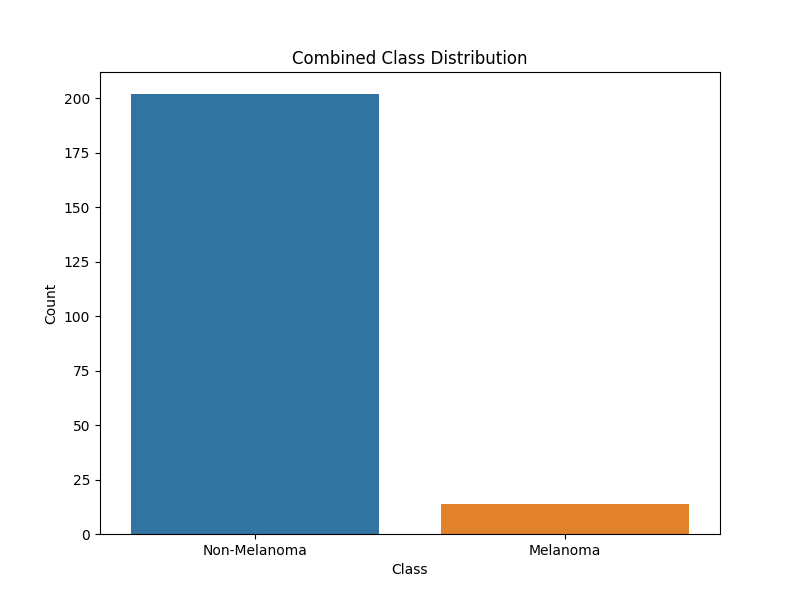

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

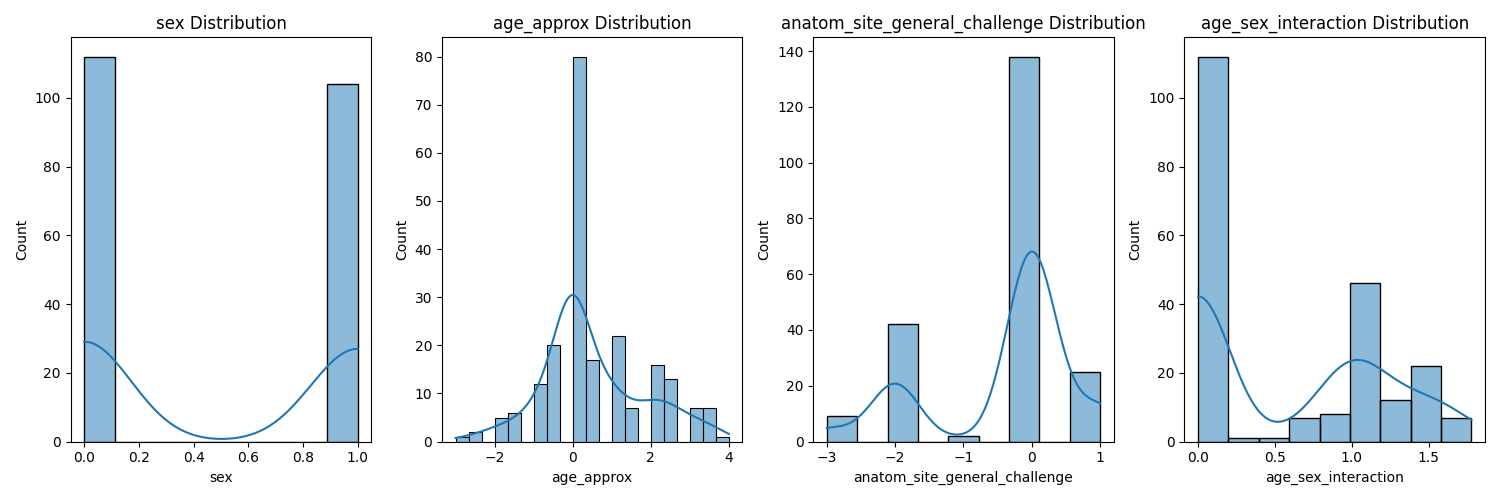

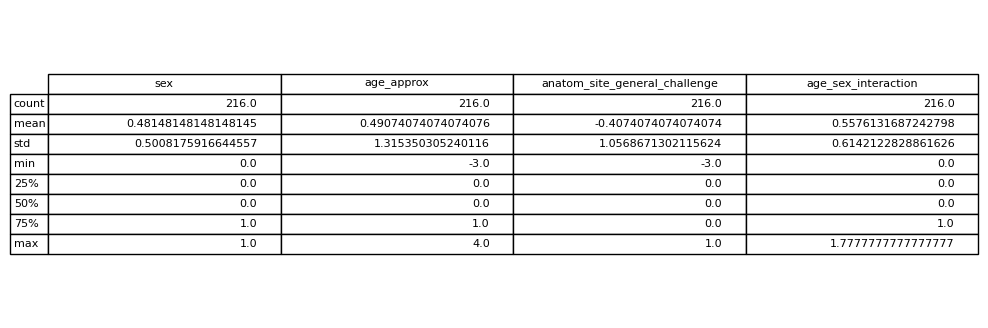

Augmenting Melanoma Images: 100%|██████████| 14/14 [00:40<00:00,  2.88s/it]


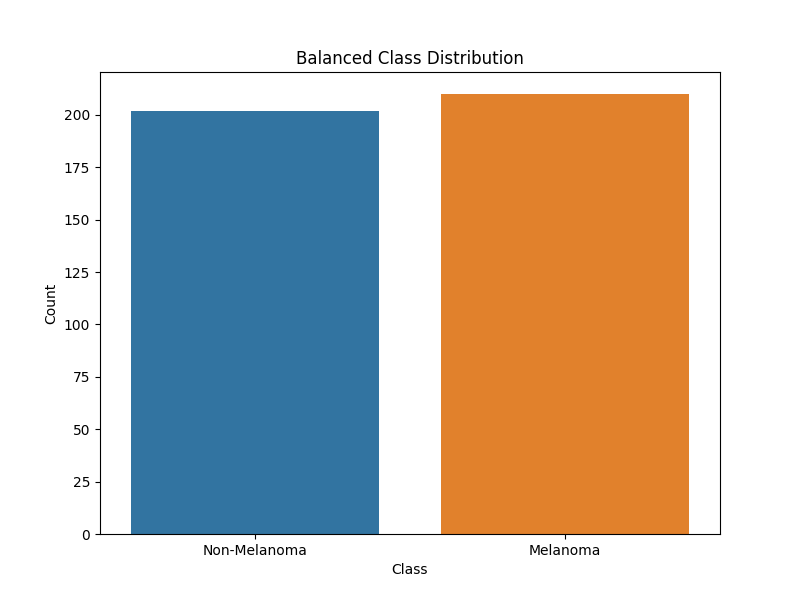

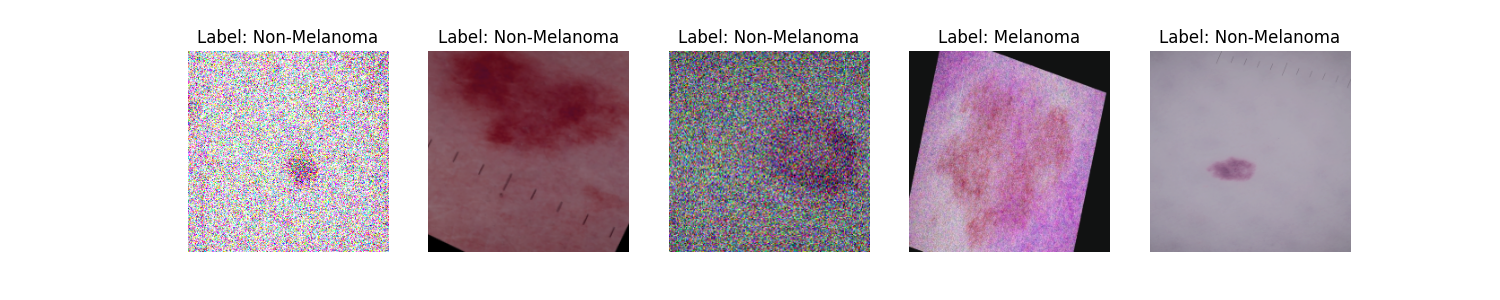

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-cadene/xception-43020ad28.pth" to /root/.cache/torch/hub/checkpoints/xception-43020ad28.pth


model.safetensors:   0%|          | 0.00/355M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/49.3M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/14.8M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/200M [00:00<?, ?B/s]

Training: 100%|██████████| 18/18 [00:27<00:00,  1.52s/it]


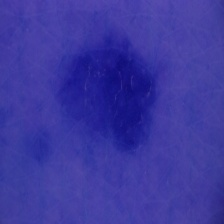

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]


Convnextv2 Epoch 1/10
Train Loss: 0.6924, Acc: 0.5694
Val Loss: 0.5585
Val Metrics: Acc 0.7258, AUC 0.9031, F1 0.6383, Precision 1.0000, Recall 0.4688, AUPRC 0.9270, Sensitivity 0.4688, Specificity 1.0000


Training: 100%|██████████| 18/18 [00:26<00:00,  1.46s/it]


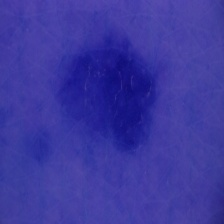

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]


Convnextv2 Epoch 2/10
Train Loss: 0.6404, Acc: 0.6562
Val Loss: 0.4704
Val Metrics: Acc 0.8065, AUC 0.9385, F1 0.7778, Precision 0.9545, Recall 0.6562, AUPRC 0.9441, Sensitivity 0.6562, Specificity 0.9667


Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]


Convnextv2 Epoch 3/10
Train Loss: 0.5752, Acc: 0.7083
Val Loss: 0.3216
Val Metrics: Acc 0.8871, AUC 0.9802, F1 0.8772, Precision 1.0000, Recall 0.7812, AUPRC 0.9823, Sensitivity 0.7812, Specificity 1.0000


Training: 100%|██████████| 18/18 [00:26<00:00,  1.46s/it]


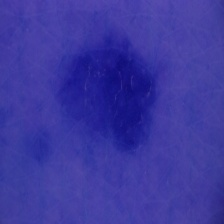

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.17it/s]


Convnextv2 Epoch 4/10
Train Loss: 0.4311, Acc: 0.8125
Val Loss: 0.2357
Val Metrics: Acc 0.9355, AUC 0.9875, F1 0.9355, Precision 0.9667, Recall 0.9062, AUPRC 0.9887, Sensitivity 0.9062, Specificity 0.9667


Training: 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]


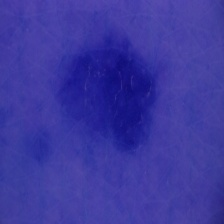

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.17it/s]


Convnextv2 Epoch 5/10
Train Loss: 0.4014, Acc: 0.8021
Val Loss: 0.2717
Val Metrics: Acc 0.9194, AUC 0.9854, F1 0.9153, Precision 1.0000, Recall 0.8438, AUPRC 0.9873, Sensitivity 0.8438, Specificity 1.0000


Training: 100%|██████████| 18/18 [00:26<00:00,  1.48s/it]


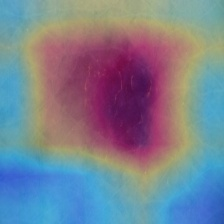

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]


Convnextv2 Epoch 6/10
Train Loss: 0.3967, Acc: 0.8090
Val Loss: 0.1843
Val Metrics: Acc 0.9355, AUC 0.9906, F1 0.9333, Precision 1.0000, Recall 0.8750, AUPRC 0.9919, Sensitivity 0.8750, Specificity 1.0000


Training: 100%|██████████| 18/18 [00:26<00:00,  1.46s/it]


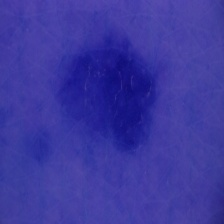

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]


Convnextv2 Epoch 7/10
Train Loss: 0.3800, Acc: 0.8056
Val Loss: 0.1278
Val Metrics: Acc 0.9677, AUC 0.9958, F1 0.9697, Precision 0.9412, Recall 1.0000, AUPRC 0.9962, Sensitivity 1.0000, Specificity 0.9333


Training: 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]


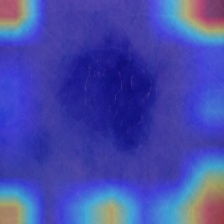

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]


Convnextv2 Epoch 8/10
Train Loss: 0.3134, Acc: 0.8785
Val Loss: 0.2052
Val Metrics: Acc 0.9194, AUC 0.9740, F1 0.9231, Precision 0.9091, Recall 0.9375, AUPRC 0.9772, Sensitivity 0.9375, Specificity 0.9000


Training: 100%|██████████| 18/18 [00:26<00:00,  1.47s/it]


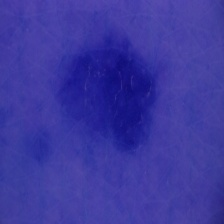

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]


Convnextv2 Epoch 9/10
Train Loss: 0.2546, Acc: 0.8819
Val Loss: 0.1464
Val Metrics: Acc 0.9516, AUC 0.9917, F1 0.9508, Precision 1.0000, Recall 0.9062, AUPRC 0.9928, Sensitivity 0.9062, Specificity 1.0000


Training: 100%|██████████| 18/18 [00:26<00:00,  1.46s/it]


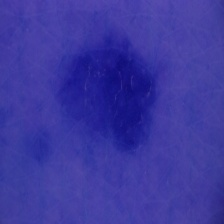

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.17it/s]


Convnextv2 Epoch 10/10
Train Loss: 0.3345, Acc: 0.8438
Val Loss: 0.1315
Val Metrics: Acc 0.9516, AUC 0.9927, F1 0.9552, Precision 0.9143, Recall 1.0000, AUPRC 0.9931, Sensitivity 1.0000, Specificity 0.9000


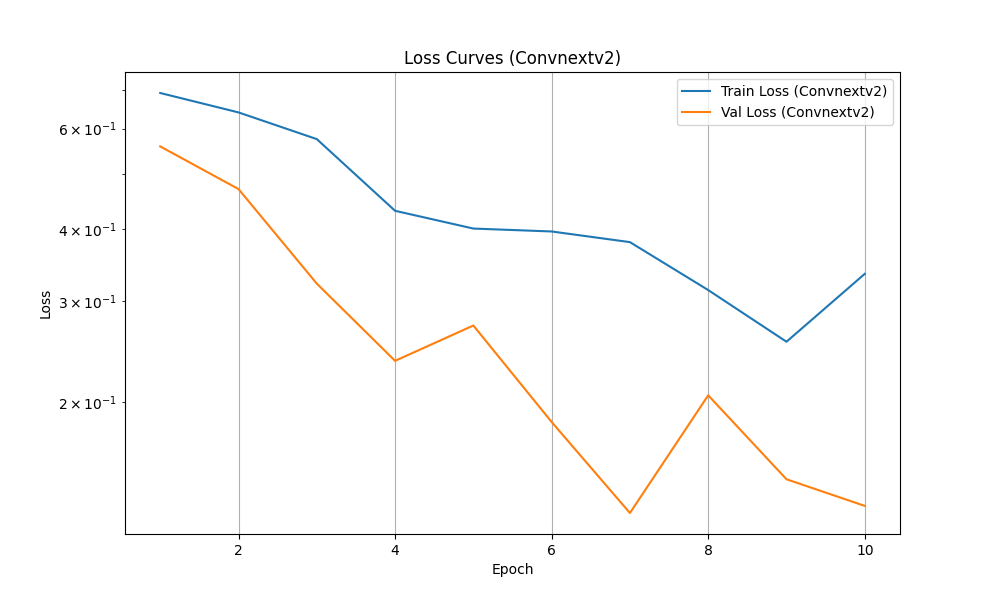

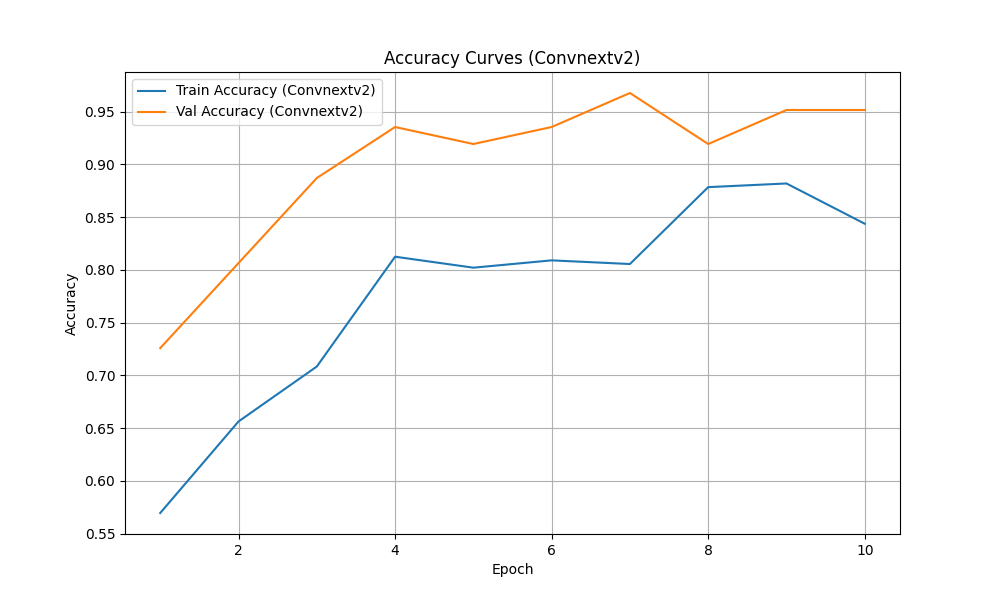

Training: 100%|██████████| 18/18 [00:21<00:00,  1.18s/it]


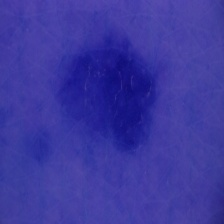

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Xception Epoch 1/10
Train Loss: 0.6734, Acc: 0.5069
Val Loss: 0.6450
Val Metrics: Acc 0.6452, AUC 0.7547, F1 0.7250, Precision 0.6042, Recall 0.9062, AUPRC 0.7400, Sensitivity 0.9062, Specificity 0.3667


Training: 100%|██████████| 18/18 [00:20<00:00,  1.17s/it]


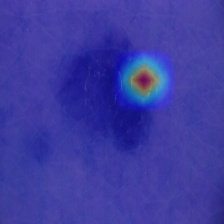

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Xception Epoch 2/10
Train Loss: 0.6444, Acc: 0.6007
Val Loss: 0.6055
Val Metrics: Acc 0.6935, AUC 0.7745, F1 0.7711, Precision 0.6275, Recall 1.0000, AUPRC 0.7612, Sensitivity 1.0000, Specificity 0.3667


Training: 100%|██████████| 18/18 [00:20<00:00,  1.16s/it]


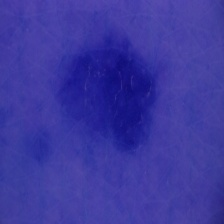

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Xception Epoch 3/10
Train Loss: 0.6209, Acc: 0.5938
Val Loss: 0.5687
Val Metrics: Acc 0.6935, AUC 0.8411, F1 0.7532, Precision 0.6444, Recall 0.9062, AUPRC 0.8279, Sensitivity 0.9062, Specificity 0.4667


Training: 100%|██████████| 18/18 [00:20<00:00,  1.16s/it]


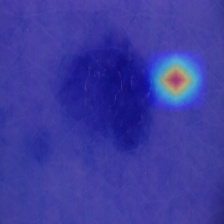

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Xception Epoch 4/10
Train Loss: 0.5817, Acc: 0.6562
Val Loss: 0.5528
Val Metrics: Acc 0.6935, AUC 0.8297, F1 0.6984, Precision 0.7097, Recall 0.6875, AUPRC 0.8251, Sensitivity 0.6875, Specificity 0.7000


Training: 100%|██████████| 18/18 [00:20<00:00,  1.16s/it]


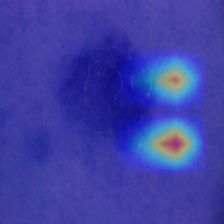

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Xception Epoch 5/10
Train Loss: 0.5849, Acc: 0.6632
Val Loss: 0.5586
Val Metrics: Acc 0.7419, AUC 0.8349, F1 0.8000, Precision 0.6667, Recall 1.0000, AUPRC 0.8190, Sensitivity 1.0000, Specificity 0.4667


Training: 100%|██████████| 18/18 [00:21<00:00,  1.17s/it]


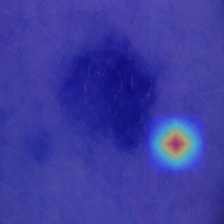

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Xception Epoch 6/10
Train Loss: 0.5614, Acc: 0.6806
Val Loss: 0.5506
Val Metrics: Acc 0.7258, AUC 0.8401, F1 0.7463, Precision 0.7143, Recall 0.7812, AUPRC 0.8219, Sensitivity 0.7812, Specificity 0.6667


Training: 100%|██████████| 18/18 [00:20<00:00,  1.16s/it]


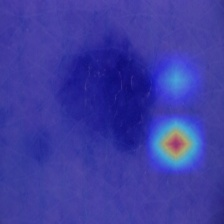

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Xception Epoch 7/10
Train Loss: 0.5608, Acc: 0.6840
Val Loss: 0.5442
Val Metrics: Acc 0.7258, AUC 0.8391, F1 0.7463, Precision 0.7143, Recall 0.7812, AUPRC 0.8208, Sensitivity 0.7812, Specificity 0.6667


Training: 100%|██████████| 18/18 [00:20<00:00,  1.16s/it]


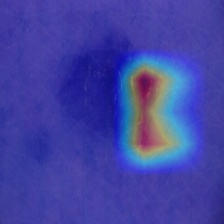

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Xception Epoch 8/10
Train Loss: 0.5637, Acc: 0.6910
Val Loss: 0.5383
Val Metrics: Acc 0.7258, AUC 0.8521, F1 0.7385, Precision 0.7273, Recall 0.7500, AUPRC 0.8419, Sensitivity 0.7500, Specificity 0.7000


Training: 100%|██████████| 18/18 [00:20<00:00,  1.16s/it]


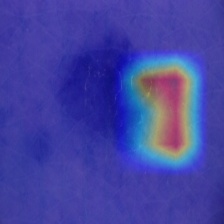

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Xception Epoch 9/10
Train Loss: 0.5457, Acc: 0.7083
Val Loss: 0.5369
Val Metrics: Acc 0.7097, AUC 0.8536, F1 0.7273, Precision 0.7059, Recall 0.7500, AUPRC 0.8420, Sensitivity 0.7500, Specificity 0.6667
Early stopping triggered for Xception.


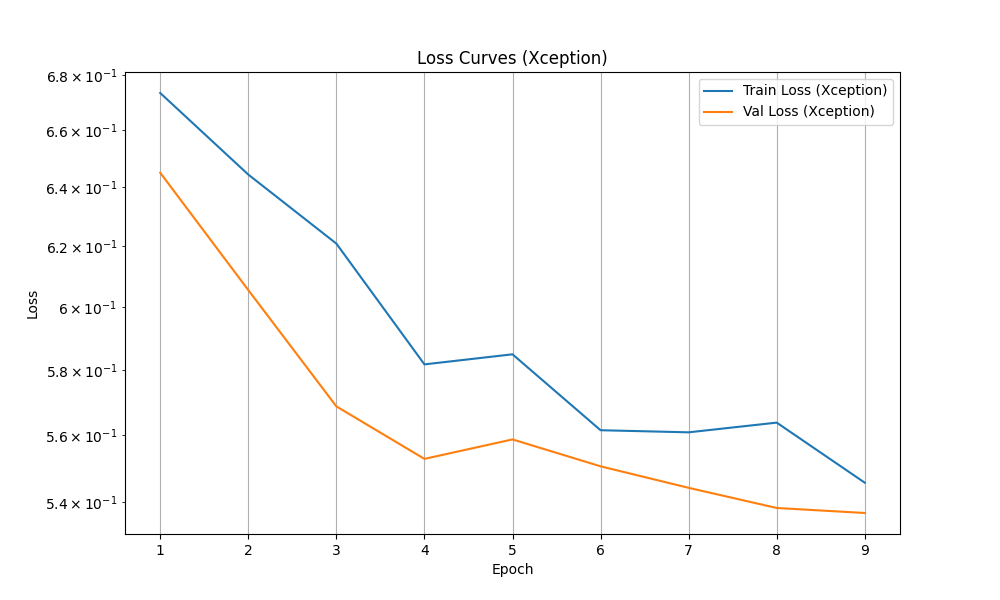

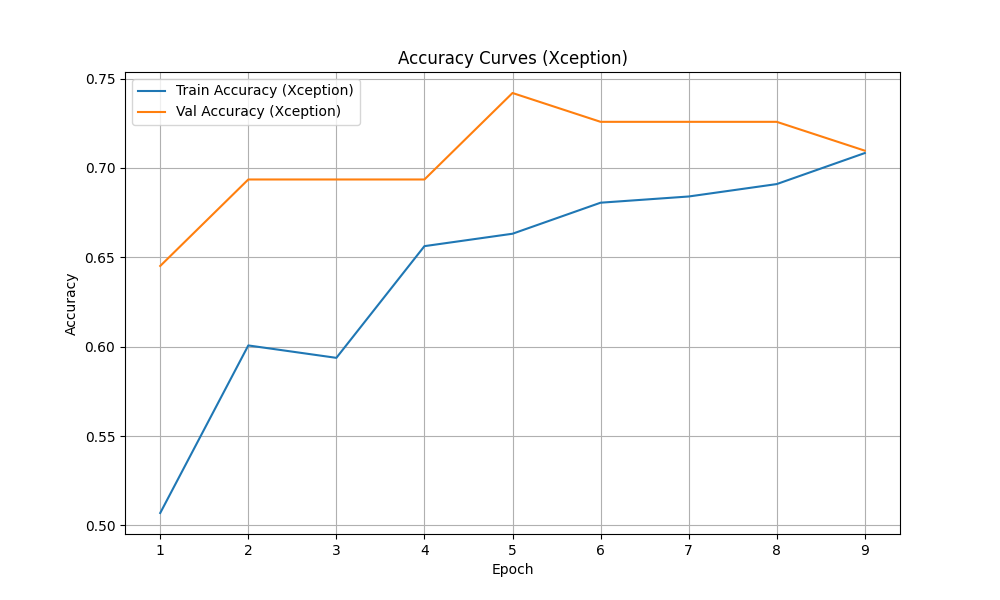

Training: 100%|██████████| 18/18 [00:21<00:00,  1.18s/it]


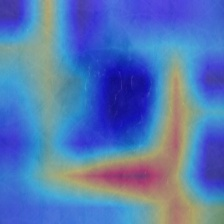

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Efficientnet Epoch 1/10
Train Loss: 0.6804, Acc: 0.5174
Val Loss: 0.6632
Val Metrics: Acc 0.5806, AUC 0.6578, F1 0.5938, Precision 0.5938, Recall 0.5938, AUPRC 0.7106, Sensitivity 0.5938, Specificity 0.5667


Training: 100%|██████████| 18/18 [00:21<00:00,  1.18s/it]


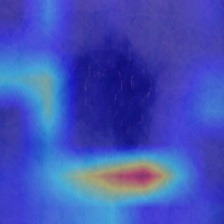

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Efficientnet Epoch 2/10
Train Loss: 0.6910, Acc: 0.5208
Val Loss: 0.6152
Val Metrics: Acc 0.6774, AUC 0.7234, F1 0.6667, Precision 0.7143, Recall 0.6250, AUPRC 0.7546, Sensitivity 0.6250, Specificity 0.7333


Training: 100%|██████████| 18/18 [00:21<00:00,  1.17s/it]


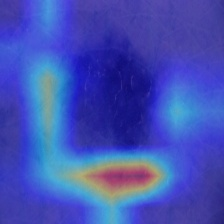

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Efficientnet Epoch 3/10
Train Loss: 0.6787, Acc: 0.5521
Val Loss: 0.5799
Val Metrics: Acc 0.6935, AUC 0.8240, F1 0.6780, Precision 0.7407, Recall 0.6250, AUPRC 0.8326, Sensitivity 0.6250, Specificity 0.7667


Training: 100%|██████████| 18/18 [00:21<00:00,  1.19s/it]


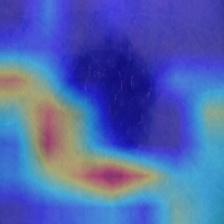

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Efficientnet Epoch 4/10
Train Loss: 0.6553, Acc: 0.5868
Val Loss: 0.5541
Val Metrics: Acc 0.7097, AUC 0.8365, F1 0.6897, Precision 0.7692, Recall 0.6250, AUPRC 0.8586, Sensitivity 0.6250, Specificity 0.8000


Training: 100%|██████████| 18/18 [00:21<00:00,  1.18s/it]


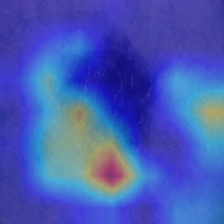

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]


Efficientnet Epoch 5/10
Train Loss: 0.6040, Acc: 0.6424
Val Loss: 0.5377
Val Metrics: Acc 0.7581, AUC 0.8833, F1 0.7273, Precision 0.8696, Recall 0.6250, AUPRC 0.9009, Sensitivity 0.6250, Specificity 0.9000


Training: 100%|██████████| 18/18 [00:21<00:00,  1.18s/it]


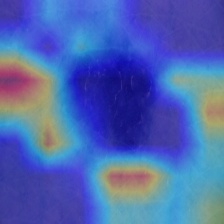

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Efficientnet Epoch 6/10
Train Loss: 0.6352, Acc: 0.5972
Val Loss: 0.5335
Val Metrics: Acc 0.7903, AUC 0.8901, F1 0.7797, Precision 0.8519, Recall 0.7188, AUPRC 0.9064, Sensitivity 0.7188, Specificity 0.8667


Training: 100%|██████████| 18/18 [00:21<00:00,  1.17s/it]


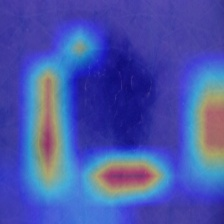

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


Efficientnet Epoch 7/10
Train Loss: 0.5930, Acc: 0.7222
Val Loss: 0.5241
Val Metrics: Acc 0.8226, AUC 0.9047, F1 0.8197, Precision 0.8621, Recall 0.7812, AUPRC 0.9166, Sensitivity 0.7812, Specificity 0.8667


Training: 100%|██████████| 18/18 [00:21<00:00,  1.17s/it]


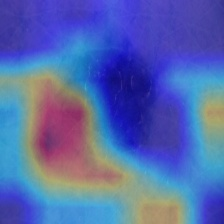

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Efficientnet Epoch 8/10
Train Loss: 0.6297, Acc: 0.5868
Val Loss: 0.5158
Val Metrics: Acc 0.8065, AUC 0.9052, F1 0.8000, Precision 0.8571, Recall 0.7500, AUPRC 0.9172, Sensitivity 0.7500, Specificity 0.8667


Training: 100%|██████████| 18/18 [00:21<00:00,  1.18s/it]


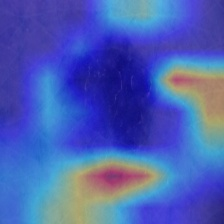

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Efficientnet Epoch 9/10
Train Loss: 0.6239, Acc: 0.6319
Val Loss: 0.5203
Val Metrics: Acc 0.8226, AUC 0.8938, F1 0.8197, Precision 0.8621, Recall 0.7812, AUPRC 0.9054, Sensitivity 0.7812, Specificity 0.8667


Training: 100%|██████████| 18/18 [00:21<00:00,  1.17s/it]


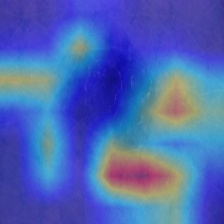

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]

Efficientnet Epoch 10/10
Train Loss: 0.6093, Acc: 0.6424
Val Loss: 0.5217
Val Metrics: Acc 0.7903, AUC 0.9052, F1 0.7797, Precision 0.8519, Recall 0.7188, AUPRC 0.9130, Sensitivity 0.7188, Specificity 0.8667


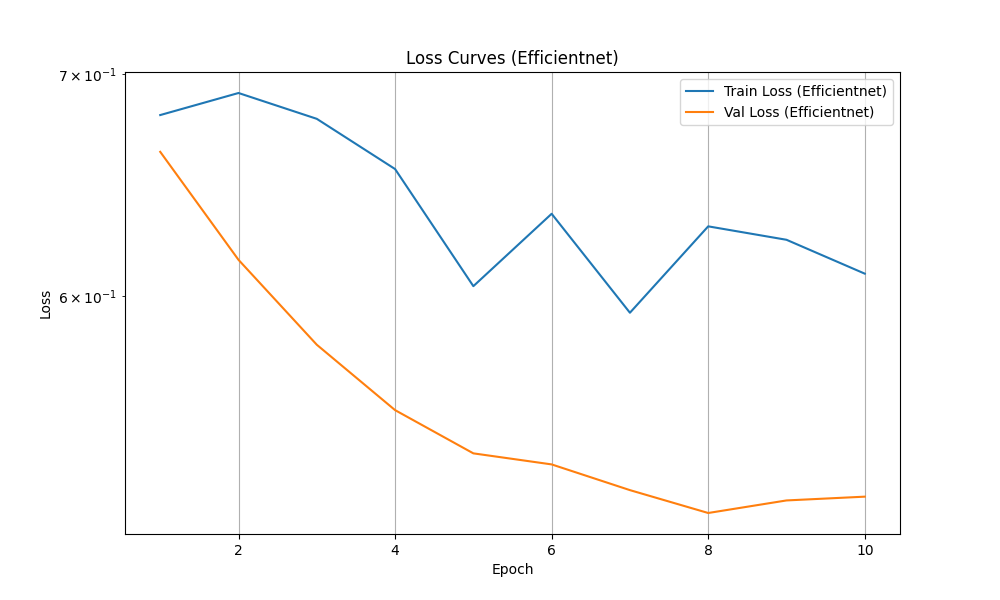

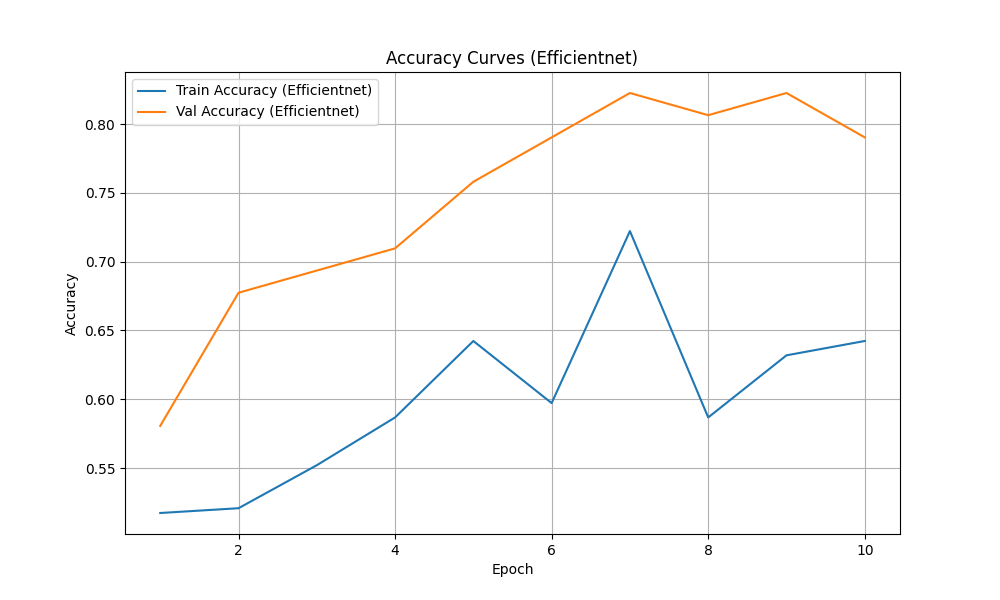

Training: 100%|██████████| 18/18 [00:22<00:00,  1.27s/it]


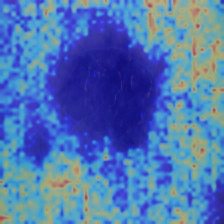

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]


Swin Epoch 1/10
Train Loss: 0.7021, Acc: 0.5069
Val Loss: 0.6076
Val Metrics: Acc 0.7903, AUC 0.8578, F1 0.8060, Precision 0.7714, Recall 0.8438, AUPRC 0.8655, Sensitivity 0.8438, Specificity 0.7333


Training: 100%|██████████| 18/18 [00:22<00:00,  1.24s/it]


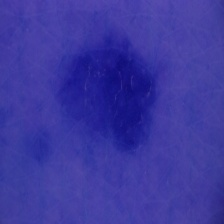

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]


Swin Epoch 2/10
Train Loss: 0.6632, Acc: 0.5799
Val Loss: 0.6036
Val Metrics: Acc 0.6935, AUC 0.8453, F1 0.6122, Precision 0.8824, Recall 0.4688, AUPRC 0.8624, Sensitivity 0.4688, Specificity 0.9333


Training: 100%|██████████| 18/18 [00:22<00:00,  1.23s/it]


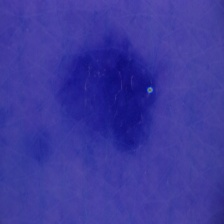

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]


Swin Epoch 3/10
Train Loss: 0.6330, Acc: 0.6319
Val Loss: 0.5661
Val Metrics: Acc 0.7903, AUC 0.9323, F1 0.7636, Precision 0.9130, Recall 0.6562, AUPRC 0.9341, Sensitivity 0.6562, Specificity 0.9333


Training: 100%|██████████| 18/18 [00:22<00:00,  1.25s/it]


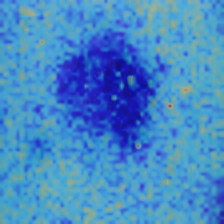

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Swin Epoch 4/10
Train Loss: 0.5801, Acc: 0.6597
Val Loss: 0.5076
Val Metrics: Acc 0.8387, AUC 0.9698, F1 0.8148, Precision 1.0000, Recall 0.6875, AUPRC 0.9739, Sensitivity 0.6875, Specificity 1.0000


Training: 100%|██████████| 18/18 [00:22<00:00,  1.25s/it]


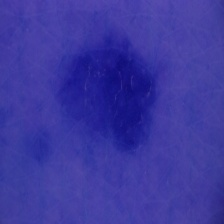

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


Swin Epoch 5/10
Train Loss: 0.5298, Acc: 0.7778
Val Loss: 0.4895
Val Metrics: Acc 0.8226, AUC 0.9760, F1 0.7925, Precision 1.0000, Recall 0.6562, AUPRC 0.9785, Sensitivity 0.6562, Specificity 1.0000


Training: 100%|██████████| 18/18 [00:22<00:00,  1.24s/it]


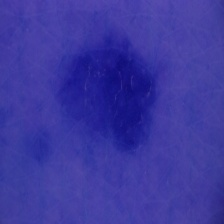

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]


Swin Epoch 6/10
Train Loss: 0.5302, Acc: 0.7465
Val Loss: 0.4659
Val Metrics: Acc 0.8226, AUC 0.9802, F1 0.7925, Precision 1.0000, Recall 0.6562, AUPRC 0.9820, Sensitivity 0.6562, Specificity 1.0000


Training: 100%|██████████| 18/18 [00:22<00:00,  1.25s/it]


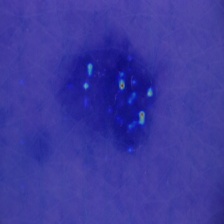

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]


Swin Epoch 7/10
Train Loss: 0.5526, Acc: 0.7500
Val Loss: 0.4590
Val Metrics: Acc 0.8226, AUC 0.9896, F1 0.7925, Precision 1.0000, Recall 0.6562, AUPRC 0.9915, Sensitivity 0.6562, Specificity 1.0000


Training: 100%|██████████| 18/18 [00:22<00:00,  1.25s/it]


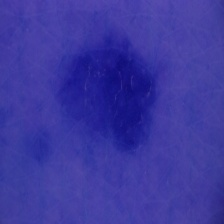

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


Swin Epoch 8/10
Train Loss: 0.5418, Acc: 0.7292
Val Loss: 0.4437
Val Metrics: Acc 0.8226, AUC 0.9906, F1 0.7925, Precision 1.0000, Recall 0.6562, AUPRC 0.9923, Sensitivity 0.6562, Specificity 1.0000
Early stopping triggered for Swin.


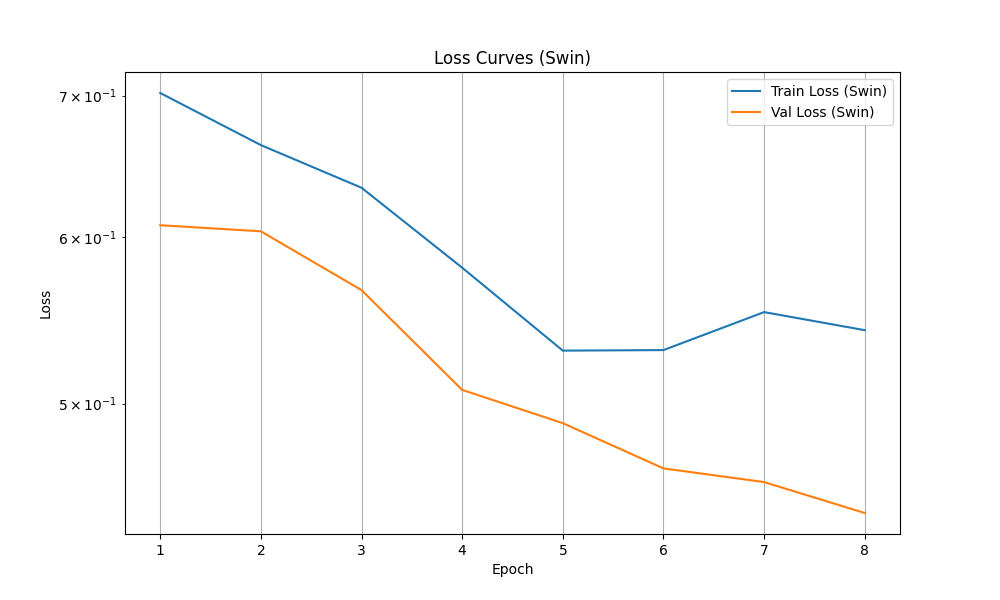

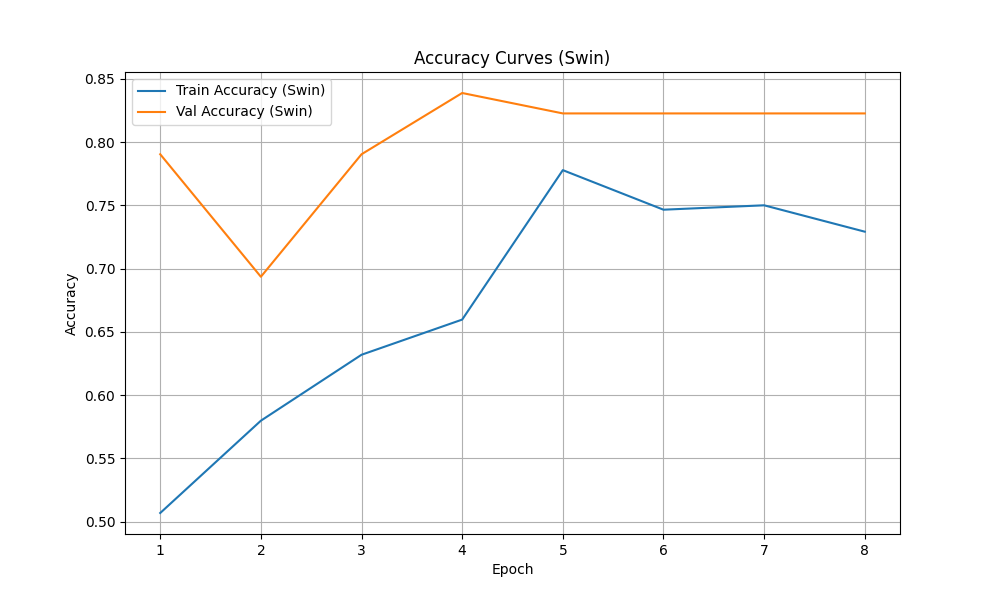

Distillation: 100%|██████████| 18/18 [00:34<00:00,  1.94s/it]


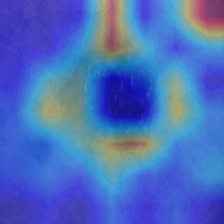

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]


Student Distillation Epoch 1/12
Train Loss: 0.4775, Acc: 0.5208
Val Loss: 0.6494
Val Metrics: Acc 0.6935, AUC 0.8615, F1 0.5957, Precision 0.9333, Recall 0.4375, AUPRC 0.8763, Sensitivity 0.4375, Specificity 0.9667


Distillation: 100%|██████████| 18/18 [00:34<00:00,  1.92s/it]


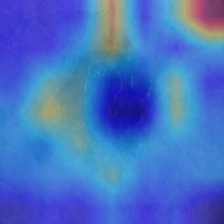

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]


Student Distillation Epoch 2/12
Train Loss: 0.5459, Acc: 0.5729
Val Loss: 0.5726
Val Metrics: Acc 0.7903, AUC 0.9312, F1 0.7547, Precision 0.9524, Recall 0.6250, AUPRC 0.9450, Sensitivity 0.6250, Specificity 0.9667


Distillation: 100%|██████████| 18/18 [00:34<00:00,  1.93s/it]


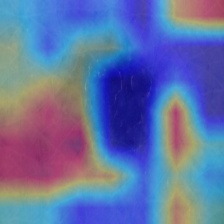

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]


Student Distillation Epoch 3/12
Train Loss: 0.6397, Acc: 0.5312
Val Loss: 0.5247
Val Metrics: Acc 0.7903, AUC 0.9500, F1 0.7451, Precision 1.0000, Recall 0.5938, AUPRC 0.9601, Sensitivity 0.5938, Specificity 1.0000


Distillation: 100%|██████████| 18/18 [00:34<00:00,  1.93s/it]


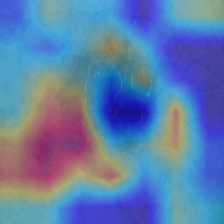

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Student Distillation Epoch 4/12
Train Loss: 0.5887, Acc: 0.6285
Val Loss: 0.4795
Val Metrics: Acc 0.8226, AUC 0.9719, F1 0.7925, Precision 1.0000, Recall 0.6562, AUPRC 0.9755, Sensitivity 0.6562, Specificity 1.0000


Distillation: 100%|██████████| 18/18 [00:34<00:00,  1.94s/it]


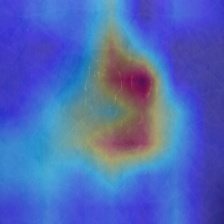

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


Student Distillation Epoch 5/12
Train Loss: 0.5670, Acc: 0.6493
Val Loss: 0.4428
Val Metrics: Acc 0.8710, AUC 0.9714, F1 0.8571, Precision 1.0000, Recall 0.7500, AUPRC 0.9751, Sensitivity 0.7500, Specificity 1.0000


Distillation: 100%|██████████| 18/18 [00:34<00:00,  1.93s/it]


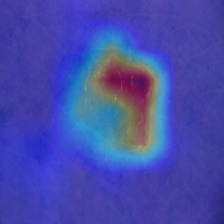

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]


Student Distillation Epoch 6/12
Train Loss: 0.5231, Acc: 0.7083
Val Loss: 0.3811
Val Metrics: Acc 0.8871, AUC 0.9708, F1 0.8772, Precision 1.0000, Recall 0.7812, AUPRC 0.9777, Sensitivity 0.7812, Specificity 1.0000


Distillation: 100%|██████████| 18/18 [00:34<00:00,  1.94s/it]


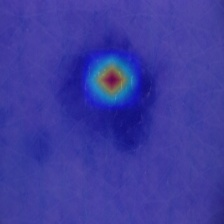

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Student Distillation Epoch 7/12
Train Loss: 0.5141, Acc: 0.7049
Val Loss: 0.3495
Val Metrics: Acc 0.8548, AUC 0.9708, F1 0.8364, Precision 1.0000, Recall 0.7188, AUPRC 0.9793, Sensitivity 0.7188, Specificity 1.0000


Distillation: 100%|██████████| 18/18 [00:34<00:00,  1.93s/it]


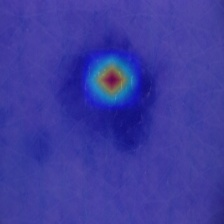

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]


Student Distillation Epoch 8/12
Train Loss: 0.4934, Acc: 0.7188
Val Loss: 0.2867
Val Metrics: Acc 0.9194, AUC 0.9865, F1 0.9153, Precision 1.0000, Recall 0.8438, AUPRC 0.9884, Sensitivity 0.8438, Specificity 1.0000


Distillation: 100%|██████████| 18/18 [00:34<00:00,  1.93s/it]


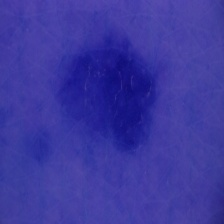

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Student Distillation Epoch 9/12
Train Loss: 0.4731, Acc: 0.8056
Val Loss: 0.2792
Val Metrics: Acc 0.9032, AUC 0.9771, F1 0.9000, Precision 0.9643, Recall 0.8438, AUPRC 0.9814, Sensitivity 0.8438, Specificity 0.9667


Distillation: 100%|██████████| 18/18 [00:34<00:00,  1.94s/it]


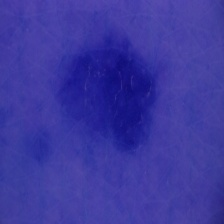

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Student Distillation Epoch 10/12
Train Loss: 0.4445, Acc: 0.7882
Val Loss: 0.2724
Val Metrics: Acc 0.9194, AUC 0.9760, F1 0.9153, Precision 1.0000, Recall 0.8438, AUPRC 0.9818, Sensitivity 0.8438, Specificity 1.0000


Distillation: 100%|██████████| 18/18 [00:34<00:00,  1.93s/it]


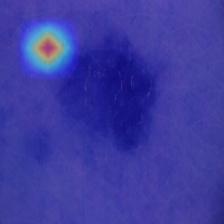

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.24it/s]


Student Distillation Epoch 11/12
Train Loss: 0.4264, Acc: 0.7812
Val Loss: 0.2624
Val Metrics: Acc 0.9194, AUC 0.9698, F1 0.9153, Precision 1.0000, Recall 0.8438, AUPRC 0.9785, Sensitivity 0.8438, Specificity 1.0000


Distillation: 100%|██████████| 18/18 [00:34<00:00,  1.93s/it]


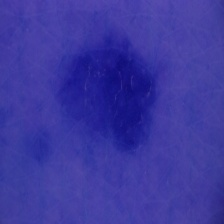

Evaluating (val): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]


Student Distillation Epoch 12/12
Train Loss: 0.3903, Acc: 0.8472
Val Loss: 0.2771
Val Metrics: Acc 0.9194, AUC 0.9708, F1 0.9153, Precision 1.0000, Recall 0.8438, AUPRC 0.9792, Sensitivity 0.8438, Specificity 1.0000


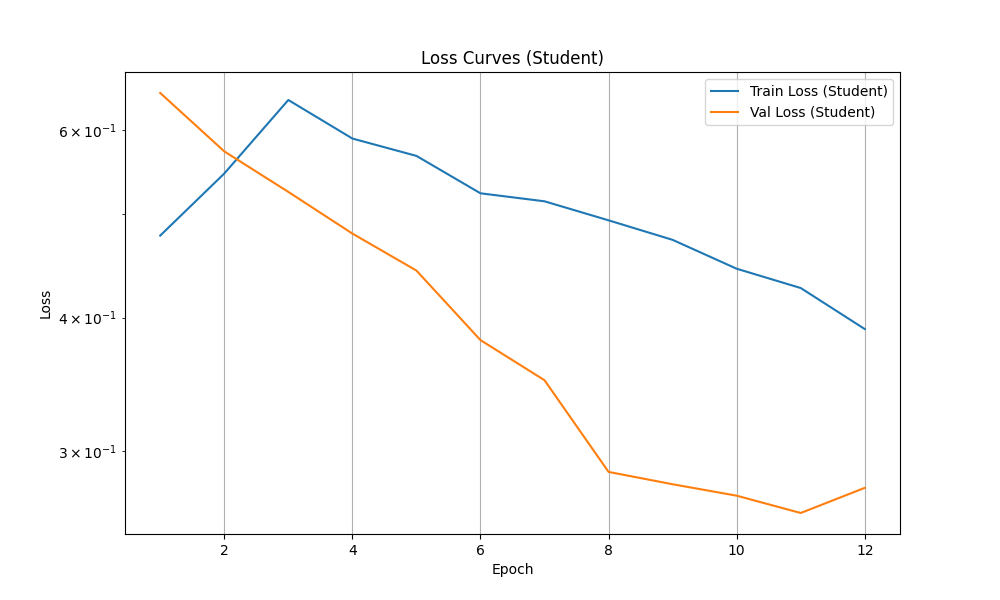

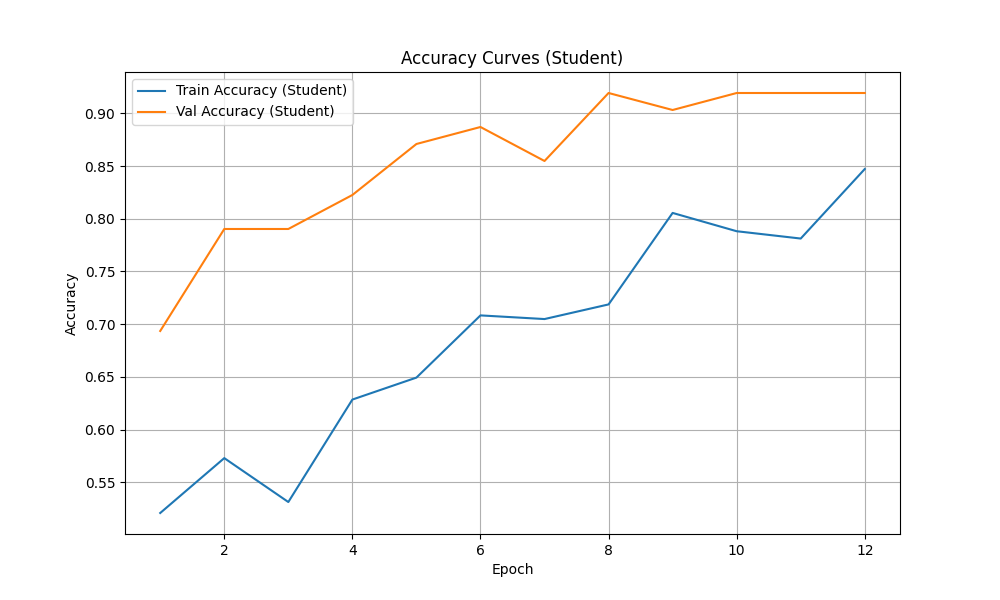

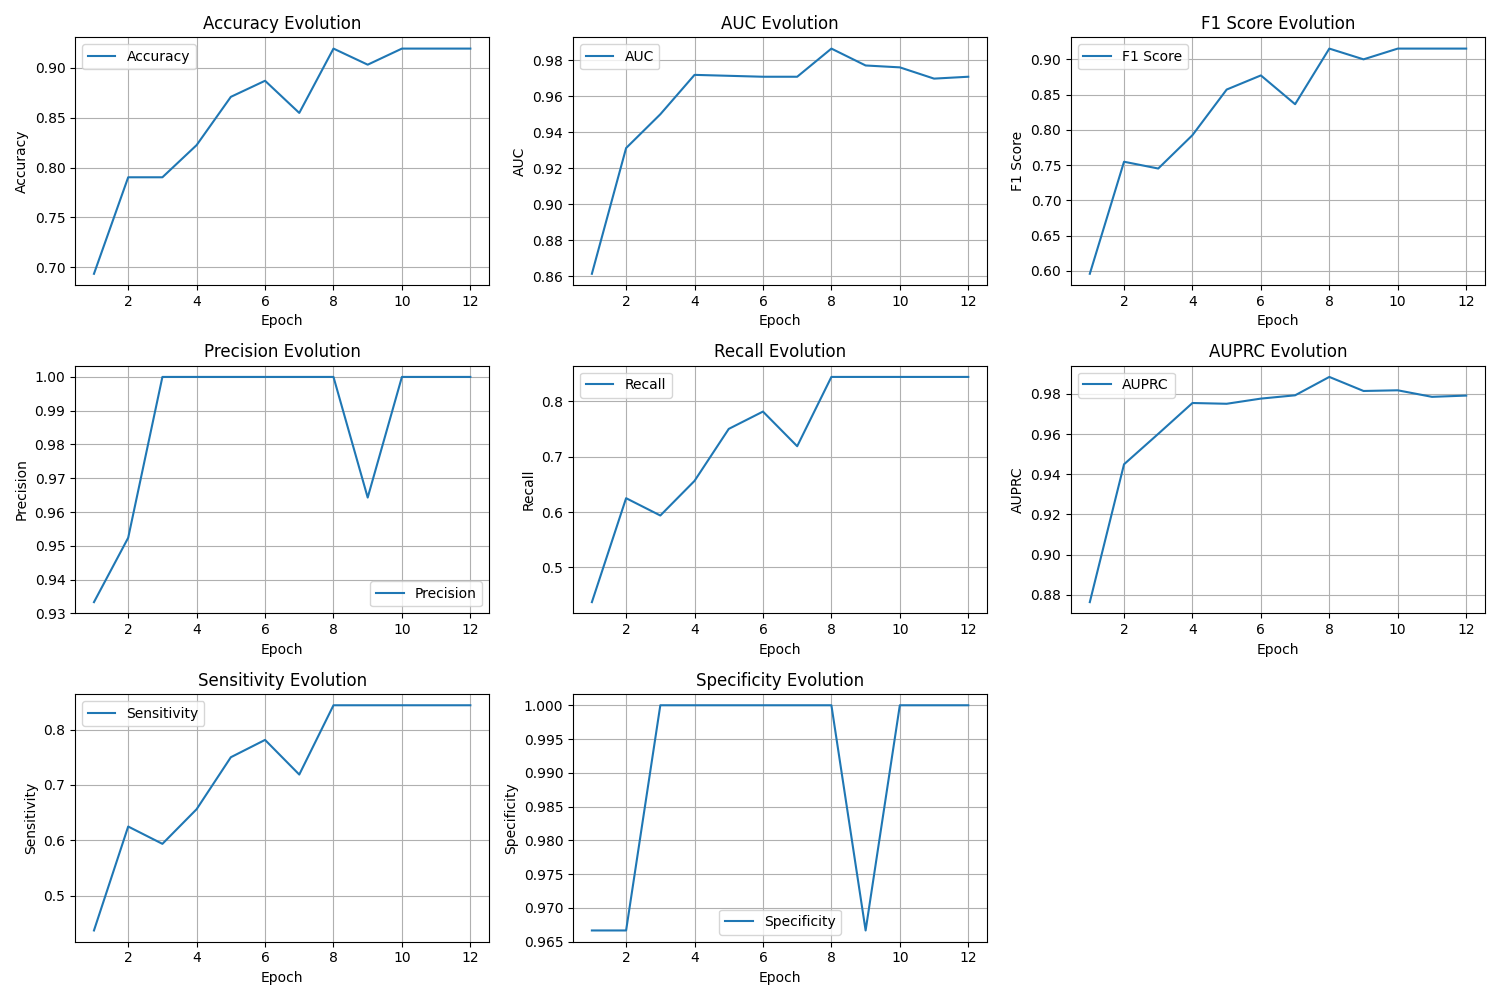

Evaluating Fusion (val): 100%|██████████| 4/4 [00:00<00:00, 758.05it/s]


FusionNet Epoch 1/10
Train Loss: 0.4151, Acc: 0.7917
Val Loss: 0.1011
Val Metrics: Acc 0.9516, AUC 0.9958, F1 0.9524, Precision 0.9677, Recall 0.9375, AUPRC 0.9963, Sensitivity 0.9375, Specificity 0.9667


Evaluating Fusion (val): 100%|██████████| 4/4 [00:00<00:00, 787.70it/s]


FusionNet Epoch 2/10
Train Loss: 0.1944, Acc: 0.9271
Val Loss: 0.0896
Val Metrics: Acc 0.9516, AUC 0.9958, F1 0.9524, Precision 0.9677, Recall 0.9375, AUPRC 0.9963, Sensitivity 0.9375, Specificity 0.9667


Evaluating Fusion (val): 100%|██████████| 4/4 [00:00<00:00, 735.55it/s]


FusionNet Epoch 3/10
Train Loss: 0.1559, Acc: 0.9479
Val Loss: 0.0977
Val Metrics: Acc 0.9516, AUC 0.9958, F1 0.9524, Precision 0.9677, Recall 0.9375, AUPRC 0.9963, Sensitivity 0.9375, Specificity 0.9667


Evaluating Fusion (val): 100%|██████████| 4/4 [00:00<00:00, 702.24it/s]


FusionNet Epoch 4/10
Train Loss: 0.1204, Acc: 0.9583
Val Loss: 0.0935
Val Metrics: Acc 0.9516, AUC 0.9958, F1 0.9524, Precision 0.9677, Recall 0.9375, AUPRC 0.9963, Sensitivity 0.9375, Specificity 0.9667


Evaluating Fusion (val): 100%|██████████| 4/4 [00:00<00:00, 786.48it/s]


FusionNet Epoch 5/10
Train Loss: 0.0976, Acc: 0.9688
Val Loss: 0.0899
Val Metrics: Acc 0.9516, AUC 0.9958, F1 0.9524, Precision 0.9677, Recall 0.9375, AUPRC 0.9963, Sensitivity 0.9375, Specificity 0.9667


Evaluating Fusion (val): 100%|██████████| 4/4 [00:00<00:00, 772.15it/s]


FusionNet Epoch 6/10
Train Loss: 0.0957, Acc: 0.9722
Val Loss: 0.0988
Val Metrics: Acc 0.9516, AUC 0.9958, F1 0.9524, Precision 0.9677, Recall 0.9375, AUPRC 0.9963, Sensitivity 0.9375, Specificity 0.9667


Evaluating Fusion (val): 100%|██████████| 4/4 [00:00<00:00, 730.68it/s]


FusionNet Epoch 7/10
Train Loss: 0.0622, Acc: 0.9861
Val Loss: 0.1056
Val Metrics: Acc 0.9677, AUC 0.9958, F1 0.9677, Precision 1.0000, Recall 0.9375, AUPRC 0.9963, Sensitivity 0.9375, Specificity 1.0000


Evaluating Fusion (val): 100%|██████████| 4/4 [00:00<00:00, 716.49it/s]


FusionNet Epoch 8/10
Train Loss: 0.0638, Acc: 0.9896
Val Loss: 0.0994
Val Metrics: Acc 0.9516, AUC 0.9958, F1 0.9524, Precision 0.9677, Recall 0.9375, AUPRC 0.9963, Sensitivity 0.9375, Specificity 0.9667
Early stopping triggered for FusionNet.


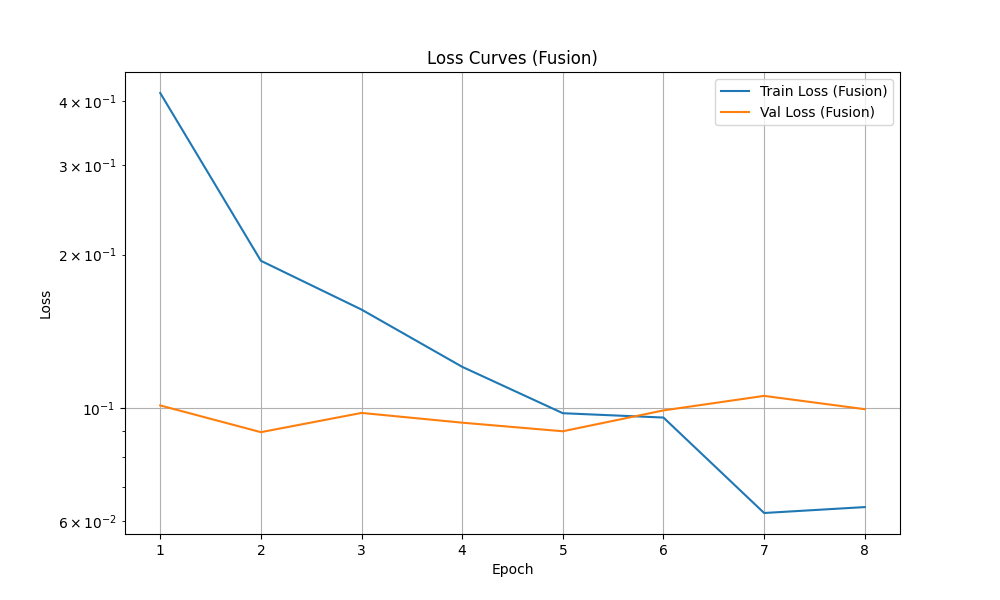

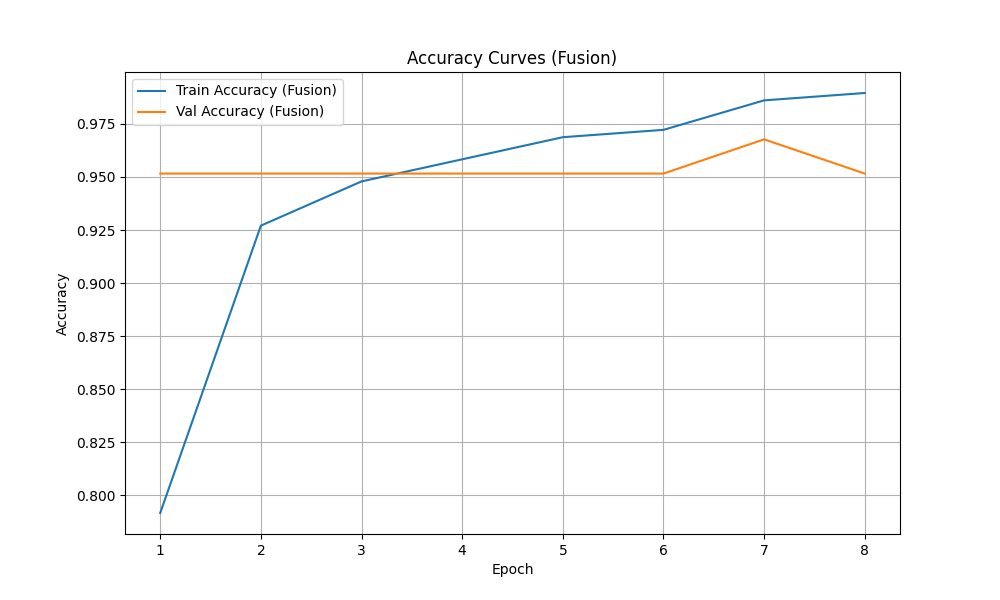

Evaluating Voting (test): 100%|██████████| 4/4 [00:05<00:00,  1.34s/it]

Voting Classifier Test Metrics:
Acc: 0.9839, AUC: 0.9979, F1: 0.9846, Precision: 0.9697, Recall: 1.0000, AUPRC: 0.9981, Sensitivity: 1.0000, Specificity: 0.9667


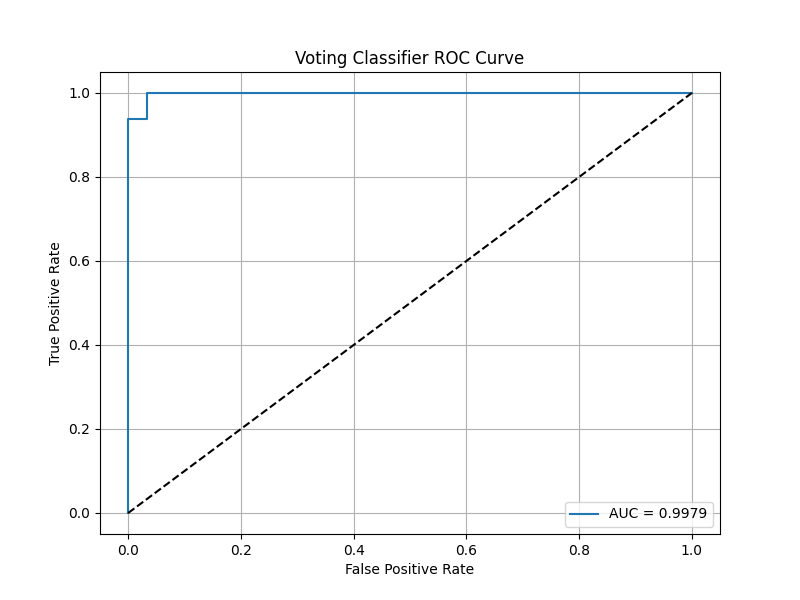

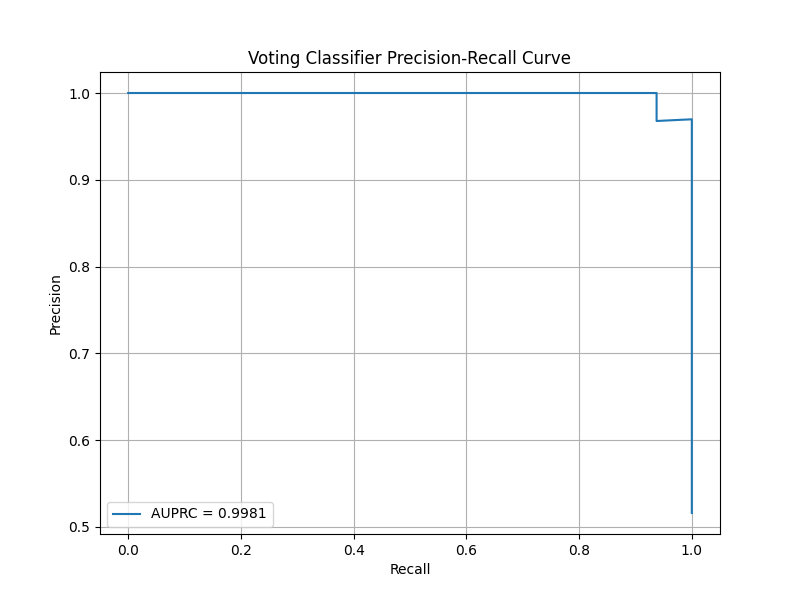

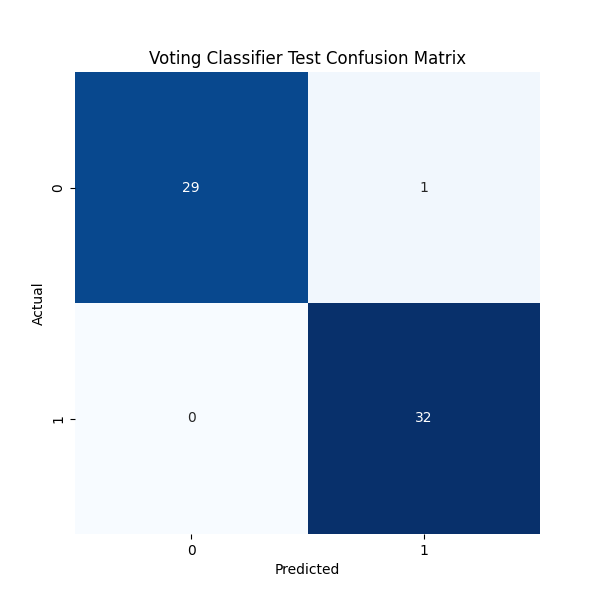

Extracting Features: 100%|██████████| 4/4 [00:05<00:00,  1.33s/it]


XGBoost Test Metrics:
Acc: 0.9839, AUC: 0.9906, F1: 0.9846, Precision: 0.9697, Recall: 1.0000, AUPRC: 0.9902, Sensitivity: 1.0000, Specificity: 0.9667


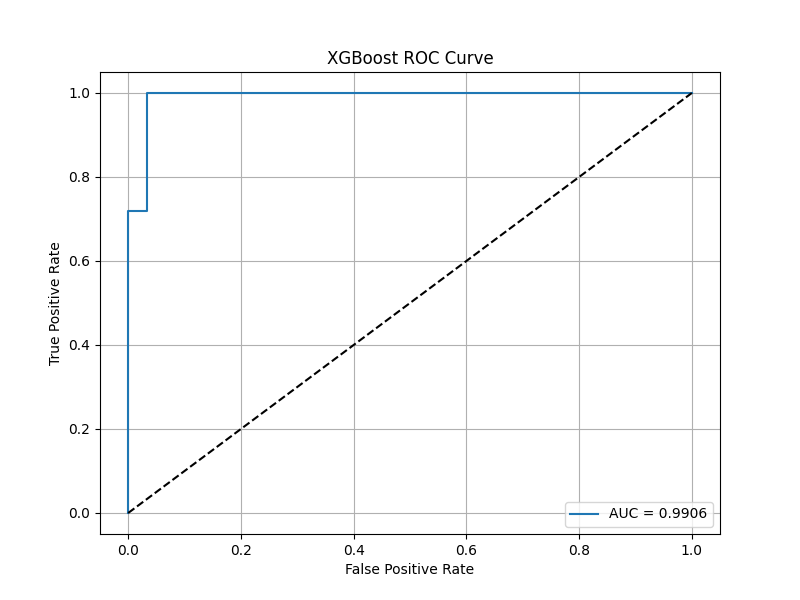

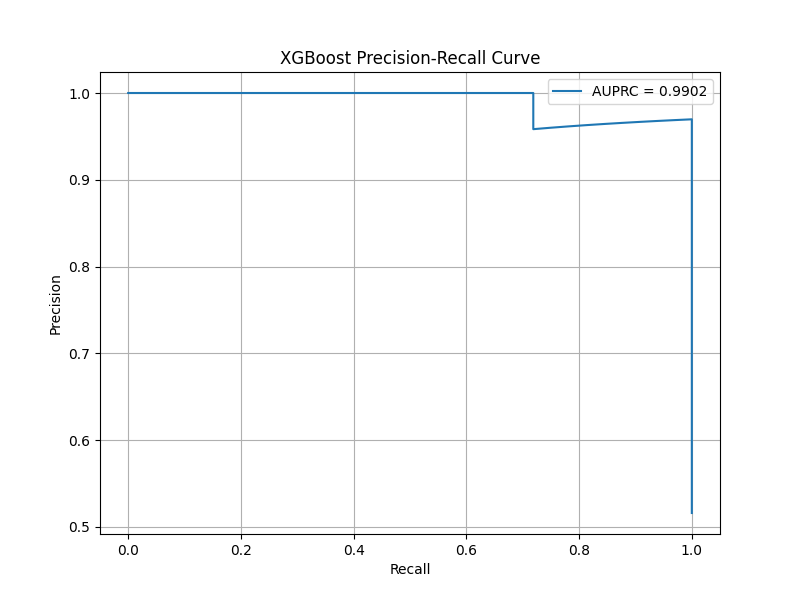

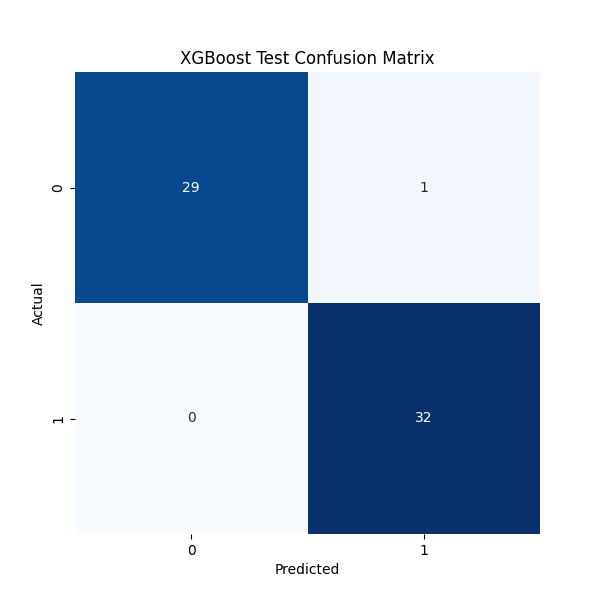

Evaluating (test): 100%|██████████| 4/4 [00:05<00:00,  1.34s/it]

Ensemble Test Metrics:
Acc: 0.9355, AUC: 0.9385, F1: 0.9412, Precision: 0.8889, Recall: 1.0000, AUPRC: 0.9186, Sensitivity: 1.0000, Specificity: 0.8667


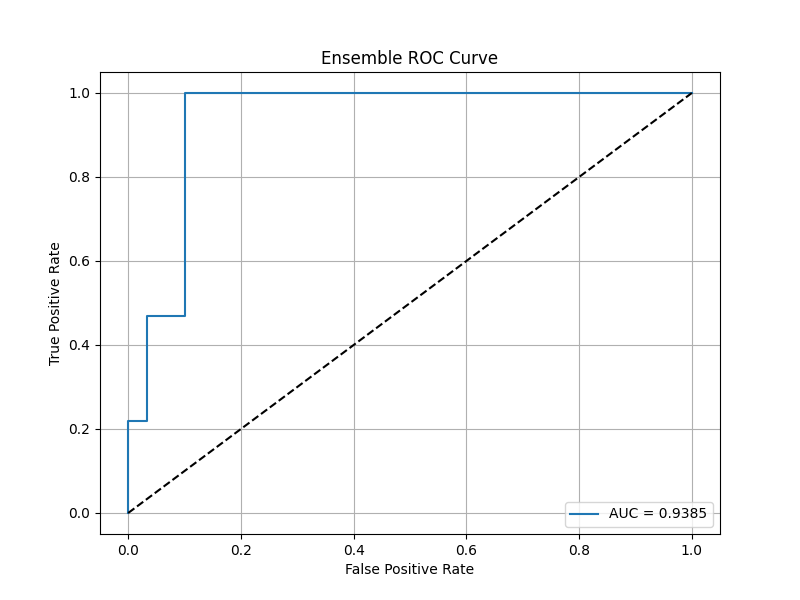

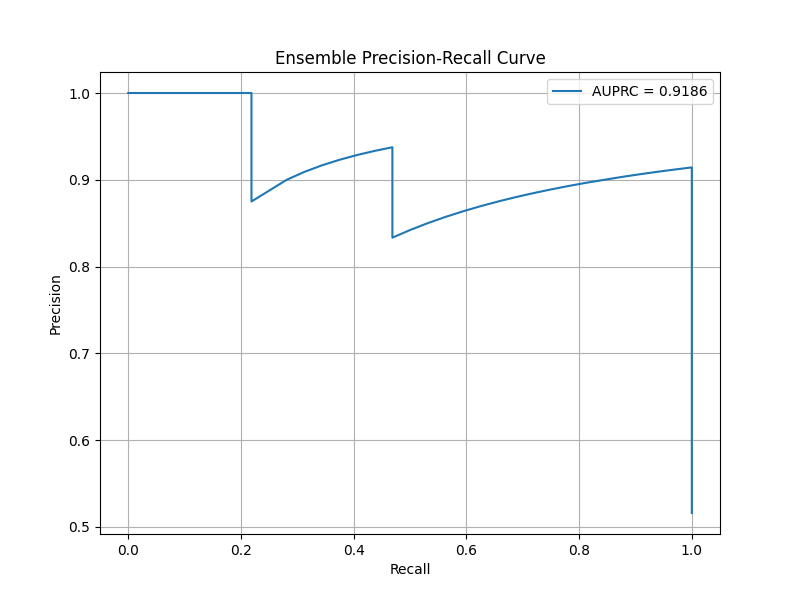

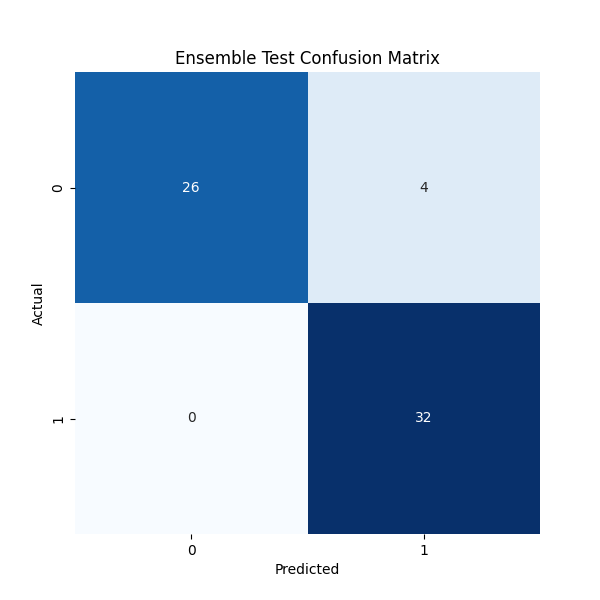


Final Model Comparison on Test Set:


Evaluating (test): 100%|██████████| 4/4 [00:04<00:00,  1.15s/it]

Xception Test Metrics:
Acc: 0.6774, AUC: 0.7224, F1: 0.7222, Precision: 0.6500, Recall: 0.8125, AUPRC: 0.6658, Sensitivity: 0.8125, Specificity: 0.5333


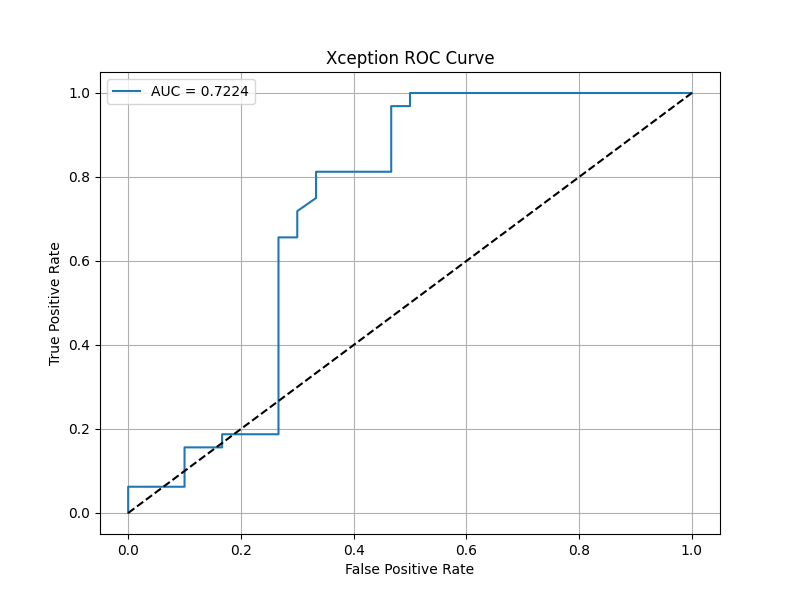

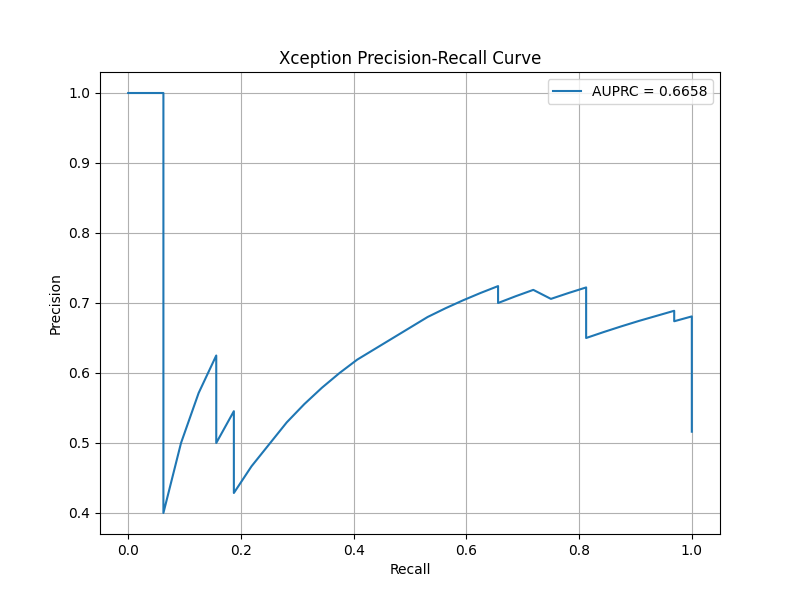

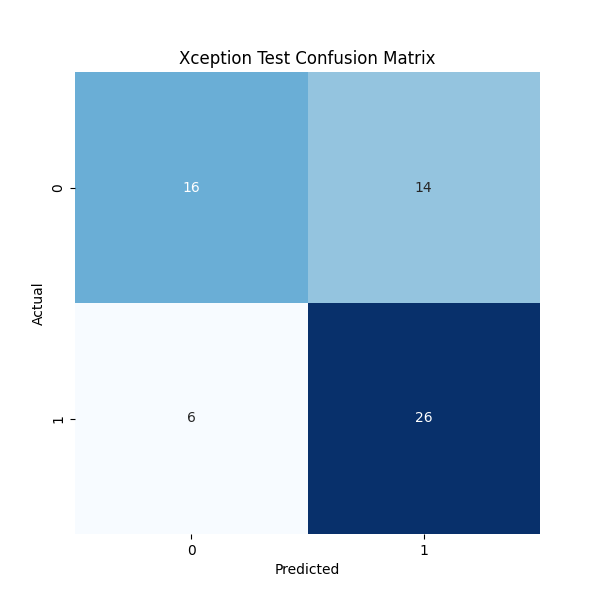

Evaluating (test): 100%|██████████| 4/4 [00:04<00:00,  1.23s/it]

Convnextv2 Test Metrics:
Acc: 0.9355, AUC: 0.9833, F1: 0.9412, Precision: 0.8889, Recall: 1.0000, AUPRC: 0.9814, Sensitivity: 1.0000, Specificity: 0.8667


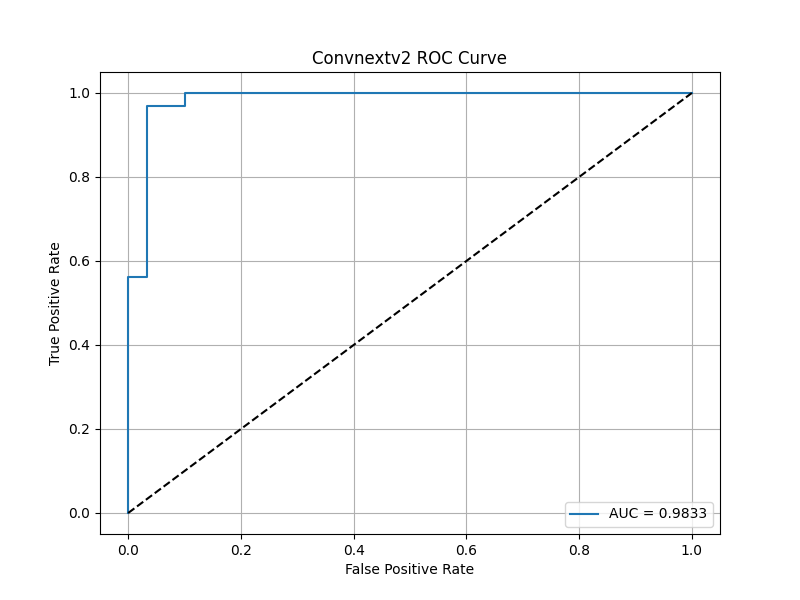

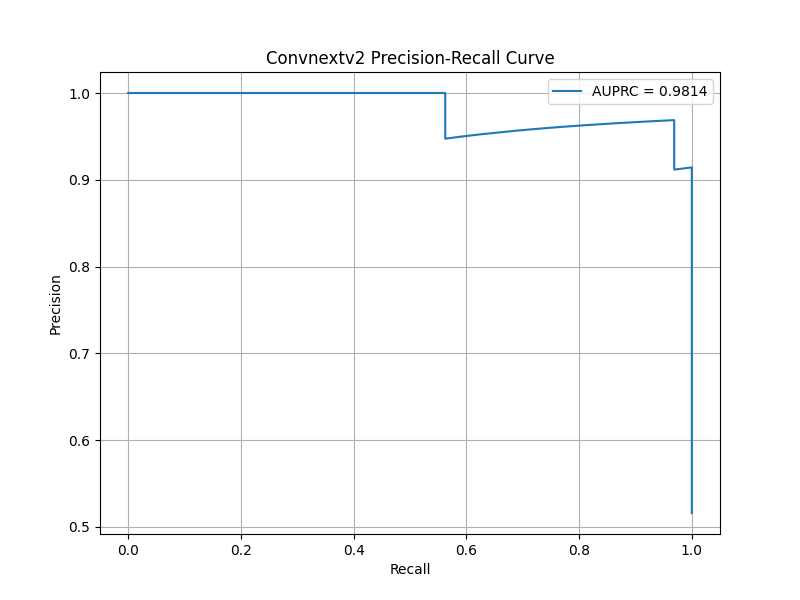

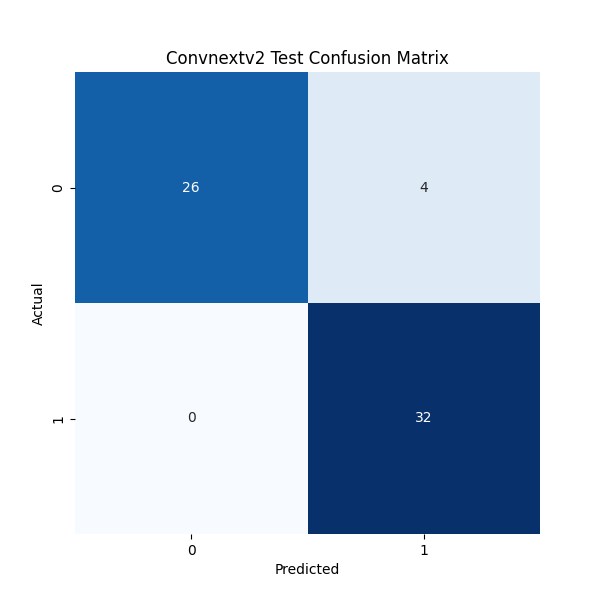

Evaluating (test): 100%|██████████| 4/4 [00:04<00:00,  1.18s/it]

Efficientnet Test Metrics:
Acc: 0.6452, AUC: 0.7917, F1: 0.6071, Precision: 0.7083, Recall: 0.5312, AUPRC: 0.6895, Sensitivity: 0.5312, Specificity: 0.7667


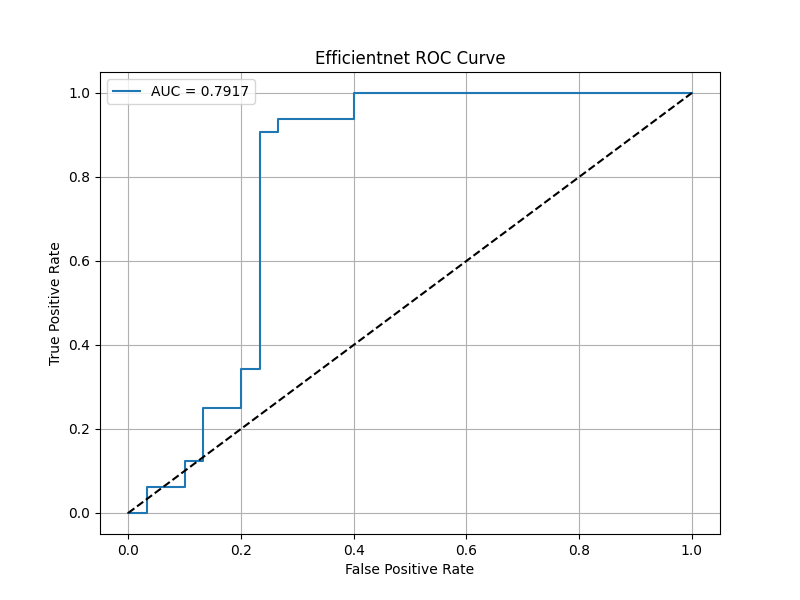

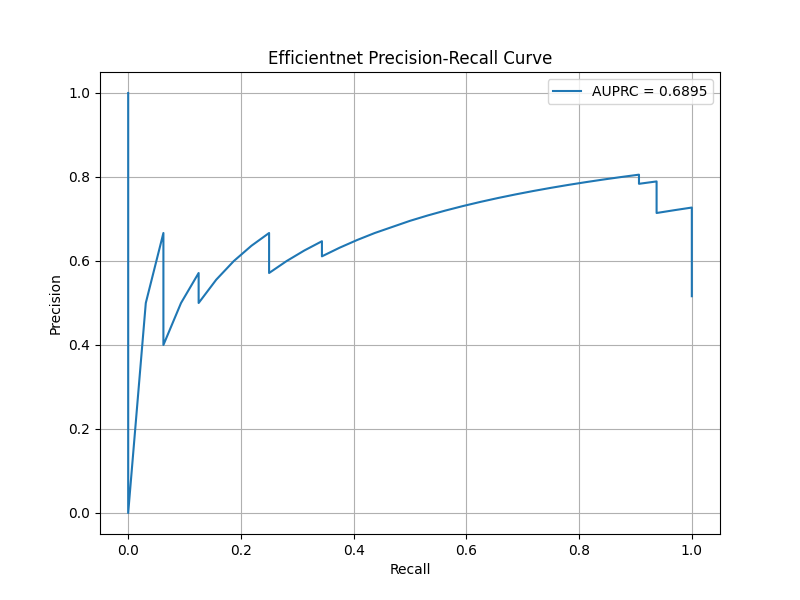

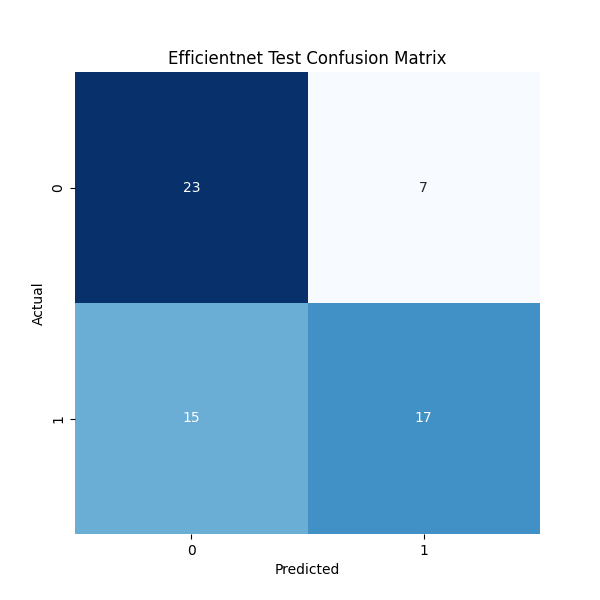

Evaluating (test): 100%|██████████| 4/4 [00:04<00:00,  1.18s/it]

Swin Test Metrics:
Acc: 0.8226, AUC: 0.9719, F1: 0.8000, Precision: 0.9565, Recall: 0.6875, AUPRC: 0.9739, Sensitivity: 0.6875, Specificity: 0.9667


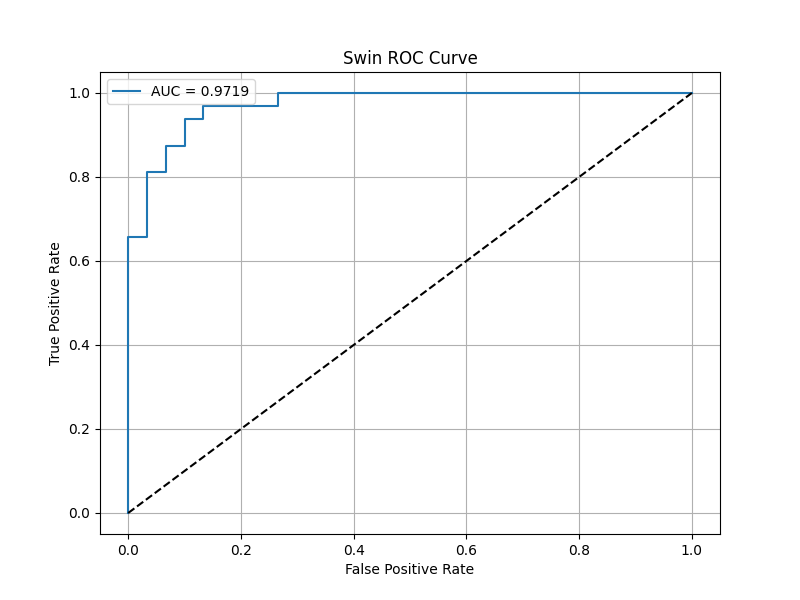

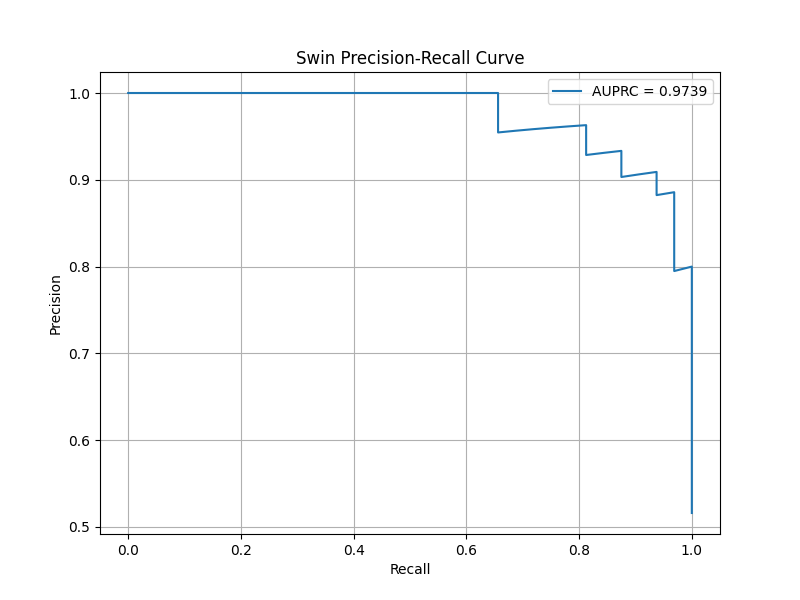

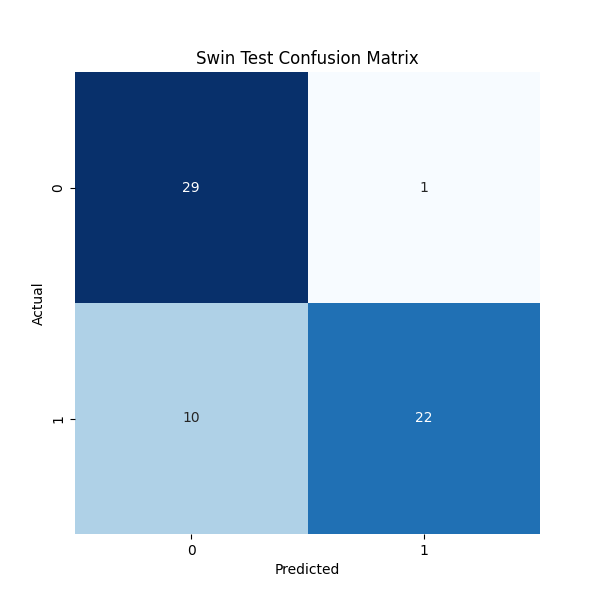

Evaluating (test): 100%|██████████| 4/4 [00:04<00:00,  1.13s/it]

Student Test Metrics:
Acc: 0.9677, AUC: 0.9906, F1: 0.9688, Precision: 0.9688, Recall: 0.9688, AUPRC: 0.9906, Sensitivity: 0.9688, Specificity: 0.9667


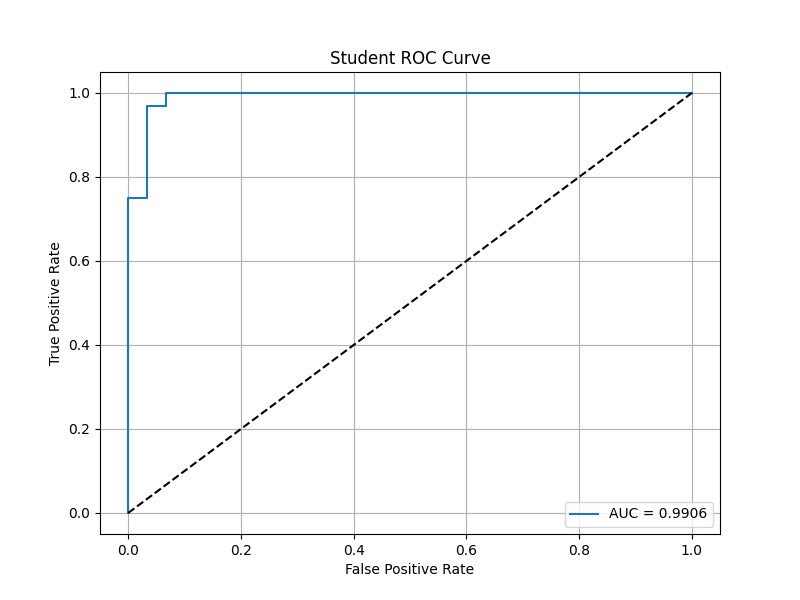

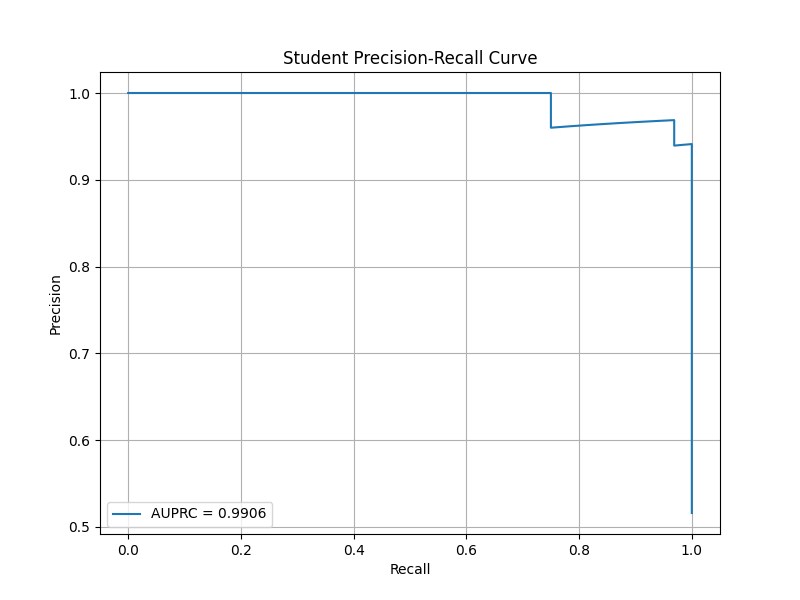

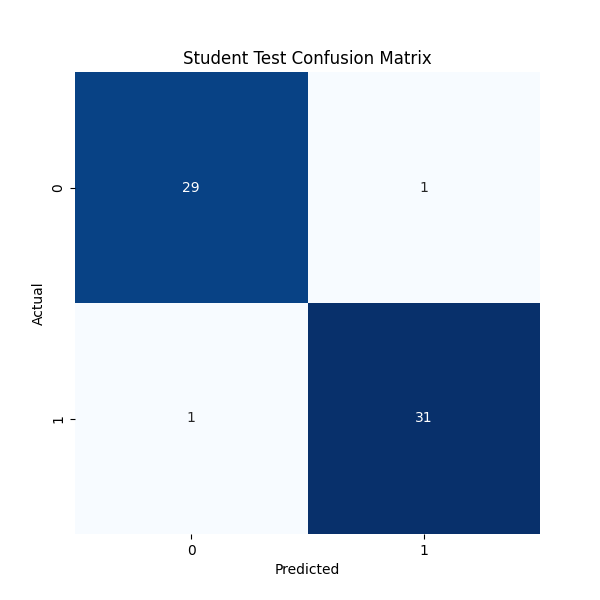

Evaluating Fusion (test): 100%|██████████| 4/4 [00:00<00:00, 624.92it/s]

FusionNet Test Metrics:
Acc: 0.9839, AUC: 0.9979, F1: 0.9846, Precision: 0.9697, Recall: 1.0000, AUPRC: 0.9981, Sensitivity: 1.0000, Specificity: 0.9667


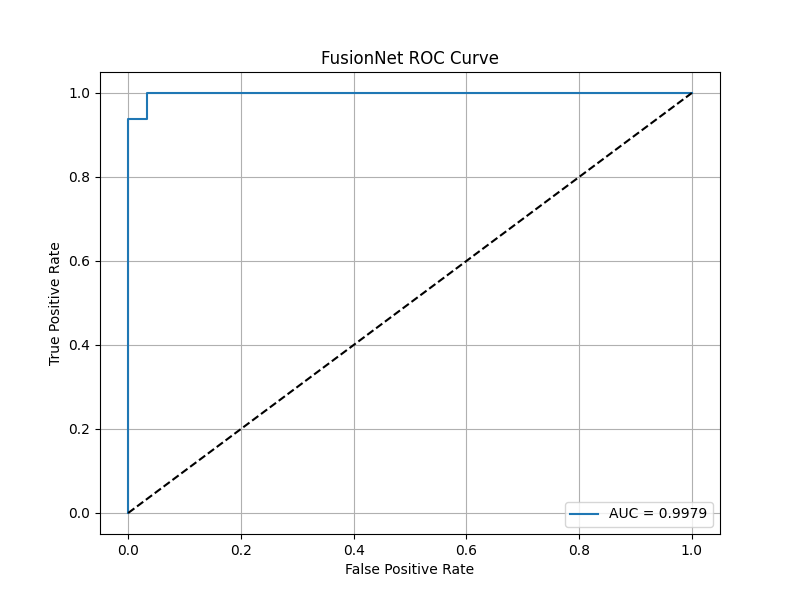

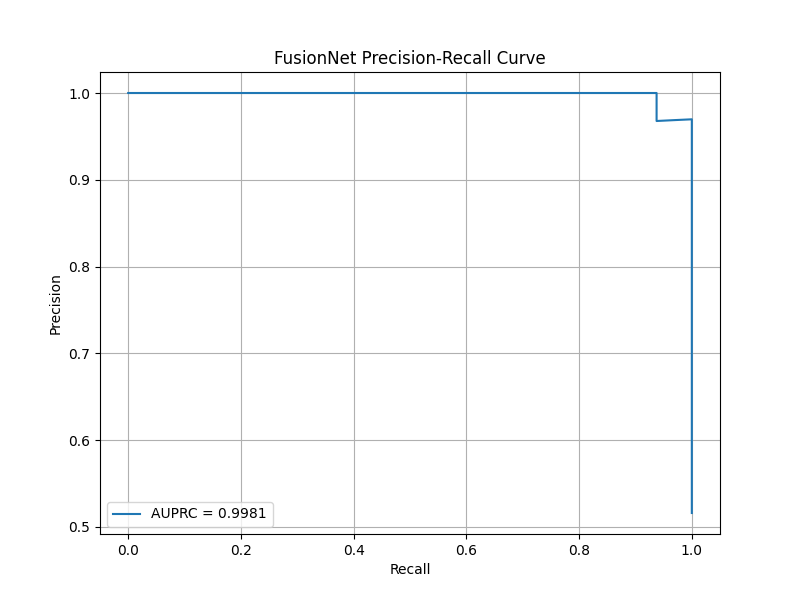

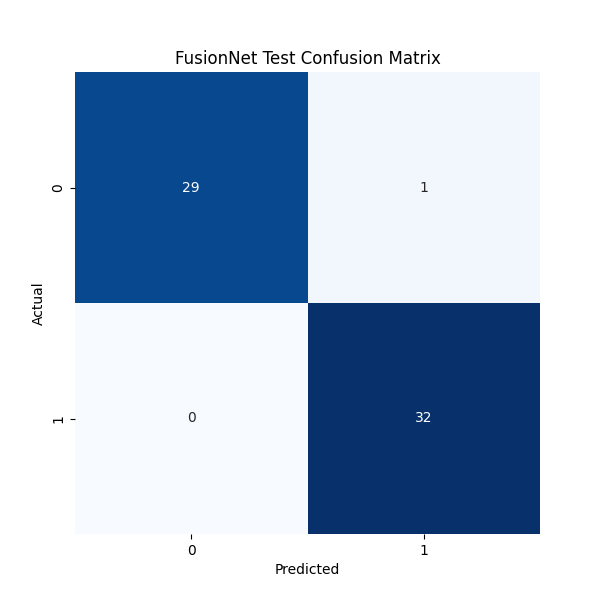

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
from main import main

results = main()